# Stock Price Forecasting

Exploring the *Time Series Problem* of stock market forecasting.


All Datasets available @

    BTC, AAPL, MSFT, TSLA, ^IXIC(NASDAQ), ^BVSP(IBOVESPA):
    https://finance.yahoo.com/

    S&P 500:
    https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_index.csv

Group Members:

    200028880 - Wallace Ben Teng Lin Wu

    222011561 - Mateus Elias de Macedo
    
    222011525 - Erick Hideki Taira

    221029051 - Rodrigo Marques Maranhao

In [1]:
# Comando para gerar os Slides:
# jupyter nbconvert Prices.ipynb --to slides --post serve --SlidesExporter.reveal_scroll=True

# Preprocessing

In [2]:
import pandas as pd
import datetime

def str_to_datetime(s):
    """ Converts a string object to the respective datetime object"""

    year, month, day = [int(i) for i in s.split('-')]
    return datetime.datetime(year=year, month=month, day=day)


price_dict = {
    "Adj Close" : "Price",
    "S&P500" : "Price",
}

def load_df(filename):
    """
    Create a pandas dataframe, filter to leave only the Price column,
    convert date to datetime and make it the index
    """

    df = pd.read_csv(filename)
    df.rename(columns = price_dict, inplace = True)

    # Univariate analysis
    df = df[["Date", "Price"]]

    # Convert date type objects to datetime object
    df["Date"] = df["Date"].apply(str_to_datetime)

    # Turn "Date" Column into dataframe index
    df.index = df.pop("Date")

    return df.dropna()


df = load_df("Datasets/MSFT.csv")

In [3]:
df

Price
Date                  
1986-03-13    0.060396
1986-03-14    0.062553
1986-03-17    0.063632
1986-03-18    0.062014
1986-03-19    0.060936
...                ...
2023-11-01  346.070007
2023-11-02  348.320007
2023-11-03  352.799988
2023-11-06  356.529999
2023-11-07  360.529999

[9491 rows x 1 columns]

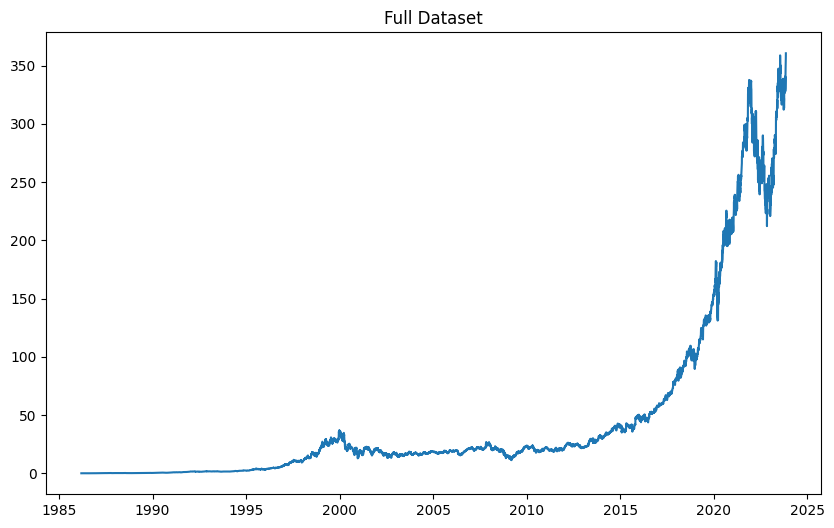

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.index, df["Price"])
plt.title("Full Dataset")
plt.show()

In [5]:
# Choose the amount of days to consider from the dataset
days = 5000 # ~13 years

# numbers of days to consider in the input of the model
lookback = 15 #


def df_to_windowed(fullDF, n=lookback, daysSelected=days):
    """
    Create a windowed Dataframe (converting into a supervised problem).
    Therefore, the last {lookback} days prices will be the (input)
    and will generate the next day price (output)
    """

    tmp_df = pd.DataFrame()
    for i in range(n, 0, -1):
        tmp_df[f"Last-{i} Price"] = fullDF["Price"].shift(periods=i)
    tmp_df["Price"] = fullDF["Price"]

    return tmp_df.dropna()[-daysSelected:]


windowed_df = df_to_windowed(df)

In [6]:
windowed_df

Last-15 Price  Last-14 Price  Last-13 Price  Last-12 Price  \
Date                                                                     
2003-12-29      16.282078      16.445030      16.532766      16.664377   
2003-12-30      16.445030      16.532766      16.664377      16.676914   
2003-12-31      16.532766      16.664377      16.676914      16.701979   
2004-01-02      16.664377      16.676914      16.701979      16.758381   
2004-01-05      16.676914      16.701979      16.758381      16.958931   
...                   ...            ...            ...            ...   
2023-11-01     332.420013     331.160004     327.730011     332.640015   
2023-11-02     331.160004     327.730011     332.640015     332.059998   
2023-11-03     327.730011     332.640015     332.059998     330.109985   
2023-11-06     332.640015     332.059998     330.109985     331.320007   
2023-11-07     332.059998     330.109985     331.320007     326.670013   

            Last-11 Price  Last-10 Price  Last-9 Price  Last-8 Price  \
Date                                                                   
2003-12-29      16.676914      16.701979     16.758381     16.958931   
2003-12-30      16.701979      16.758381     16.958931     16.946400   
2003-12-31      16.758381      16.958931     16.946400     17.172014   
2004-01-02      16.958931      16.946400     17.172014     17.146950   
2004-01-05      16.946400      17.172014     17.146950     17.034134   
...                   ...            ...           ...           ...   
2023-11-01     332.059998     330.109985    331.320007    326.670013   
2023-11-02     330.109985     331.320007    326.670013    329.320007   
2023-11-03     331.320007     326.670013    329.320007    330.529999   
2023-11-06     326.670013     329.320007    330.529999    340.670013   
2023-11-07     329.320007     330.529999    340.670013    327.890015   

            Last-7 Price  Last-6 Price  Last-5 Price  Last-4 Price  \
Date                                                                 
2003-12-29     16.946400     17.172014     17.146950     17.034134   
2003-12-30     17.172014     17.146950     17.034134     17.015335   
2003-12-31     17.146950     17.034134     17.015335     16.946400   
2004-01-02     17.034134     17.015335     16.946400     17.052935   
2004-01-05     17.015335     16.946400     17.052935     17.209623   
...                  ...           ...           ...           ...   
2023-11-01    329.320007    330.529999    340.670013    327.890015   
2023-11-02    330.529999    340.670013    327.890015    329.809998   
2023-11-03    340.670013    327.890015    329.809998    337.309998   
2023-11-06    327.890015    329.809998    337.309998    338.109985   
2023-11-07    329.809998    337.309998    338.109985    346.070007   

            Last-3 Price  Last-2 Price  Last-1 Price       Price  
Date                                                              
2003-12-29     17.015335     16.946400     17.052935   17.209623  
2003-12-30     16.946400     17.052935     17.209623   17.247215  
2003-12-31     17.052935     17.209623     17.247215   17.153221  
2004-01-02     17.209623     17.247215     17.153221   17.203354  
2004-01-05     17.247215     17.153221     17.203354   17.635786  
...                  ...           ...           ...         ...  
2023-11-01    329.809998    337.309998    338.109985  346.070007  
2023-11-02    337.309998    338.109985    346.070007  348.320007  
2023-11-03    338.109985    346.070007    348.320007  352.799988  
2023-11-06    346.070007    348.320007    352.799988  356.529999  
2023-11-07    348.320007    352.799988    356.529999  360.529999  

[5000 rows x 16 columns]

In [7]:
windowed_df["Price"].describe()

count    5000.000000
mean       80.652762
std        92.782729
min        11.327569
25%        20.142975
50%        30.797449
75%       102.435174
max       360.529999
Name: Price, dtype: float64

In [8]:
def split_xy(windowedNP):
    """
    Split np.array into X and y
    """

    X = windowedNP[:, :-1]
    y = windowedNP[:, -1]
    return (X, y)

## Standardization (Padronização)

Standardization != Normalization

Padronização != Normalização

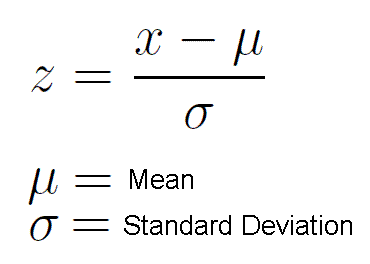

In [9]:
from IPython import display
display.Image("Images/Standardization.png")

In [10]:
from sklearn.preprocessing import StandardScaler

def scale_data(train, vali, test):
    """ Get Scaled Data """ 
    
    scaler = StandardScaler()
    X_train, y_train = split_xy(scaler.fit_transform(train))
    X_vali, y_vali = split_xy(scaler.transform(vali))
    X_test, y_test = split_xy(scaler.transform(test))
    return scaler, [X_train, X_vali, X_test], [y_train, y_vali, y_test]

In [11]:
def descale_data(train, vali, test, pred, scaler):
    """ Get de-Scaled Data """ 
    X_train, y_train = split_xy(train.to_numpy())
    X_vali, y_vali = split_xy(vali.to_numpy())
    X_test, y_test = split_xy(test.to_numpy())
    X_result, y_result = split_xy(scaler.inverse_transform(pred))
    return [y_train, y_vali, y_test, y_result]

# Models

In [12]:
# Command to disable GPU:

# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Disable Tensorflow warnings,infos and errors
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# model input: (last {lookback} days prices, 1 feature = "price")
models = []

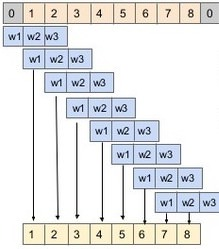

In [14]:
display.Image("Images/Convolution.jpg")

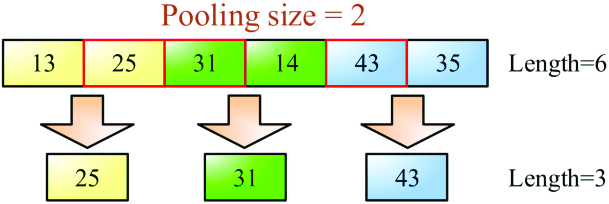

In [15]:
display.Image("Images/MaxPooling.png")

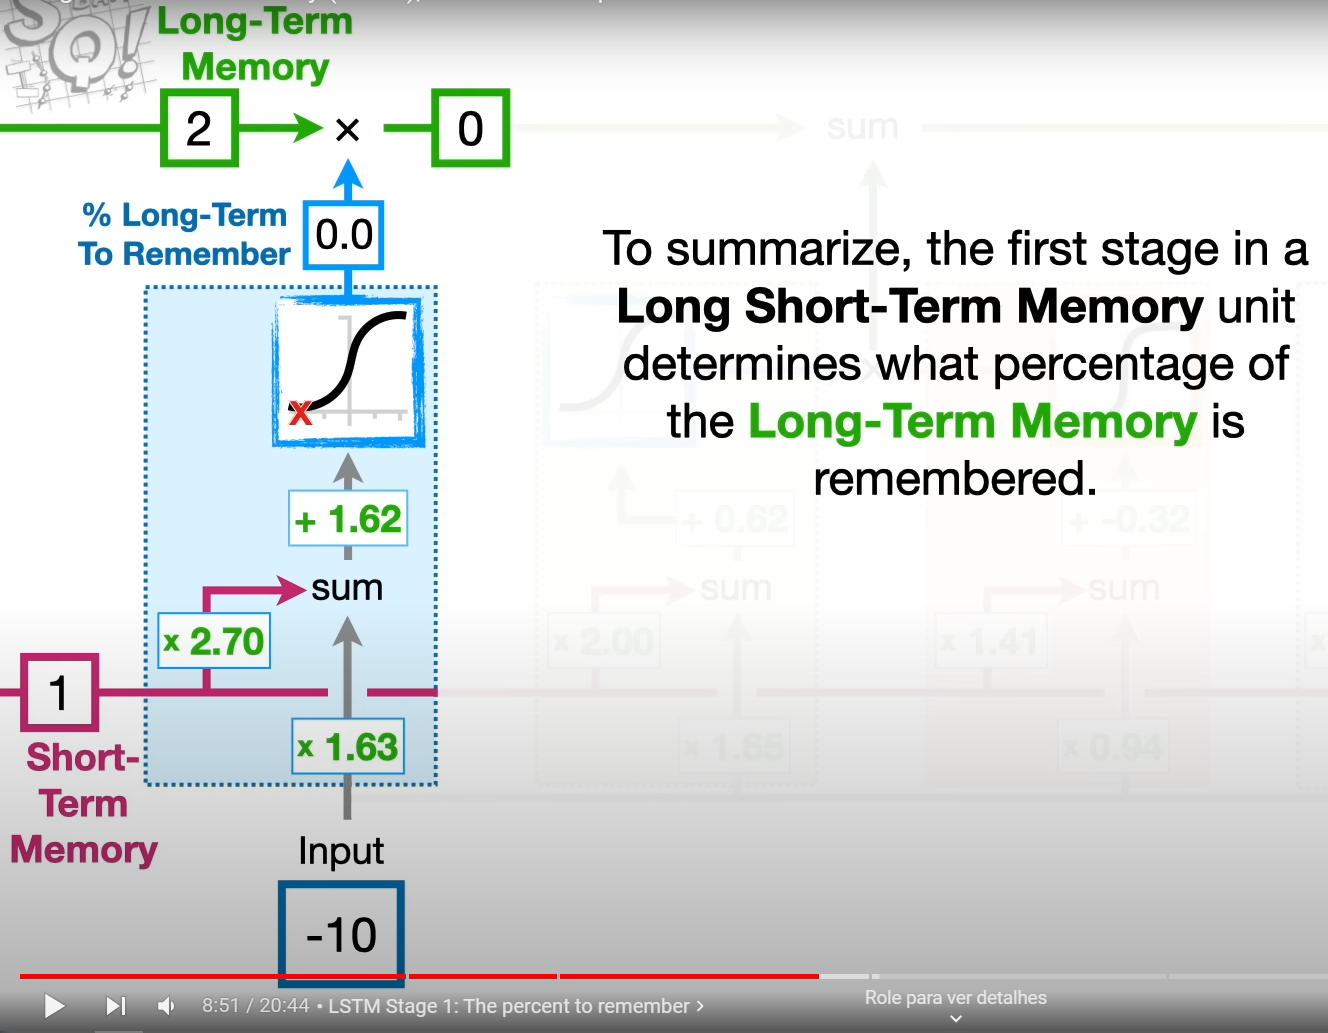

In [16]:
display.Image("Images/Forget_Gate.png")

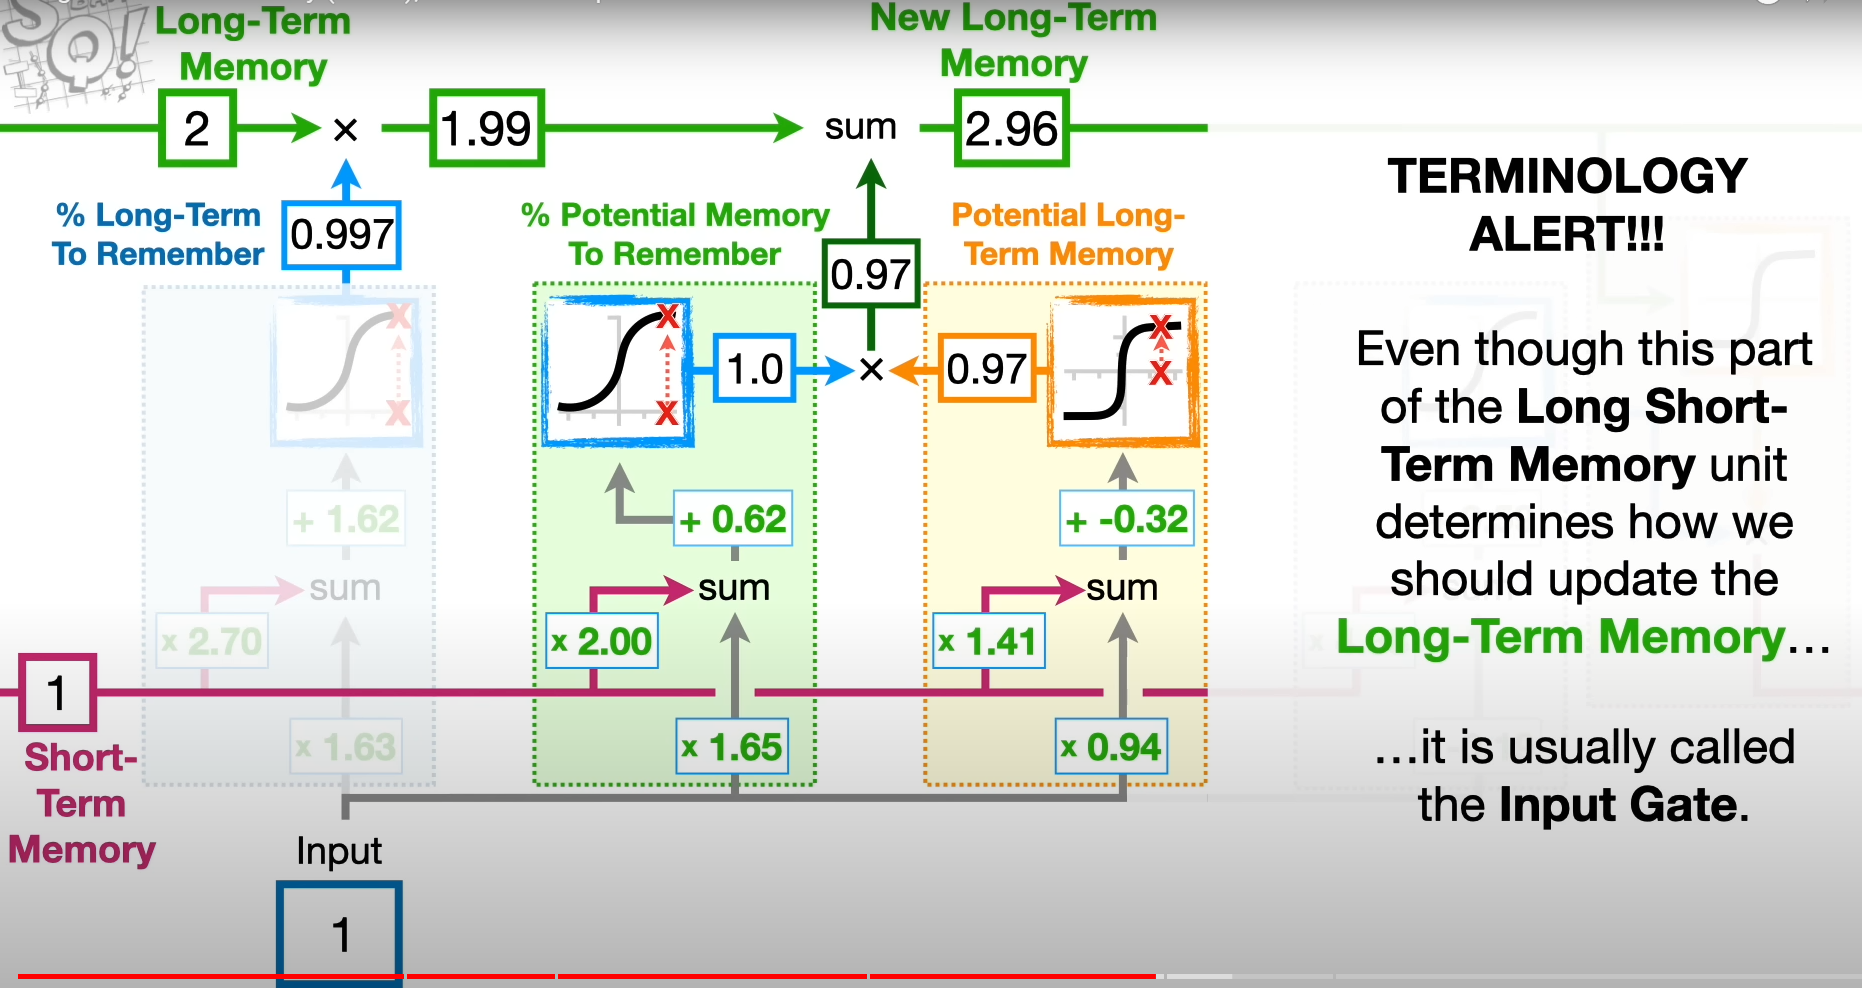

In [17]:
display.Image("Images/Input_Gate.png")

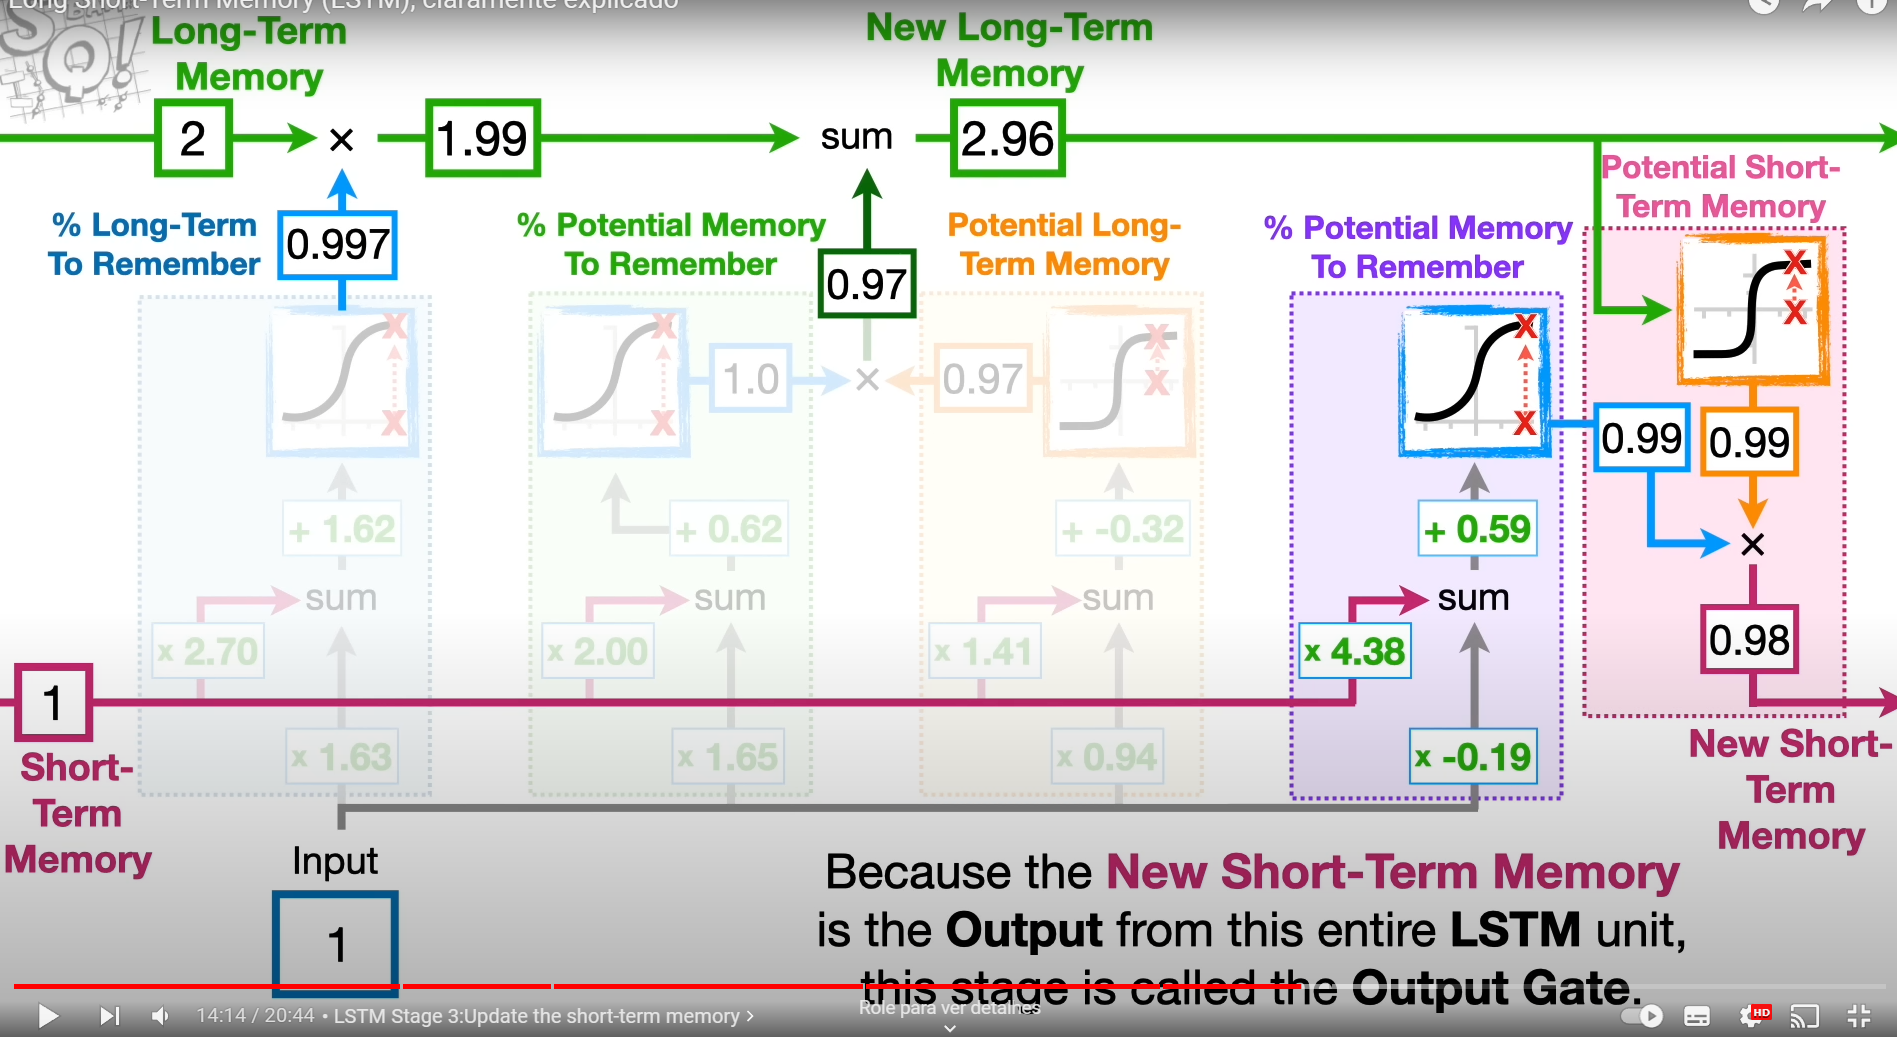

In [18]:
display.Image("Images/Output_Gate.png")

In [19]:
models.append(
    Sequential([ # CNN+LSTM+Dropout
       layers.Input((lookback, 1)),
       layers.Conv1D(128, kernel_size=3, activation="relu", padding="same"),
       layers.MaxPooling1D(pool_size=2, padding="same"),
       layers.LSTM(128, return_sequences=True),
       layers.Flatten(),
       layers.Dropout(0.3),
       layers.Dense(128),
       layers.Dense(1)
    ]),
)
models[-1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 128)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 8, 128)            131584    
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                        

In [20]:
models.append(
    Sequential([ # LSTM
        layers.Input((lookback, 1)),
        layers.LSTM(128, return_sequences=True),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(128),
        layers.Dense(128),
        layers.Dense(1)
    ]),
)
models[-1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 15, 128)           66560     
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               245888    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 329089 (1.26 MB)
Trainable params: 32908

In [21]:
models.append(
    Sequential([ # CNN
        layers.Input((lookback, 1)),
        layers.Conv1D(128, kernel_size=3, activation="relu", padding="same"),
        layers.MaxPooling1D(pool_size=2, padding="same"),
        layers.Flatten(),
        layers.Dense(128),
        layers.Dense(1)
    ]),
)
models[-1].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 15, 128)           512       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 131841 (515.00 KB)
Trainable params: 131841 (515.00 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [22]:
models.append(
    Sequential([ # Rede Neural Simples
        layers.Input((lookback, 1)),
        layers.Flatten(),
        layers.Dense(128),
        layers.Dense(128),
        layers.Dense(1)
    ]),
)
models[-1].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               2048      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18689 (73.00 KB)
Trainable params: 18689 (73.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

## Auxilary Functions

In [23]:
# For each year, 60% train, 20% validation, 20% test
def sliding_window(windowed, trainSZ=2100, valiSZ=450, testSZ=450, step=500):
    """
    Sliding Window Generator
    """

    for i in range(0, len(windowed) - trainSZ - testSZ - valiSZ + 1, step):
        train_slice = windowed[i : i+trainSZ]
        vali_slice = windowed[i+trainSZ : i+trainSZ+valiSZ]
        test_slice = windowed[i+trainSZ+valiSZ : i+trainSZ+valiSZ+testSZ]
        yield (train_slice, vali_slice, test_slice)

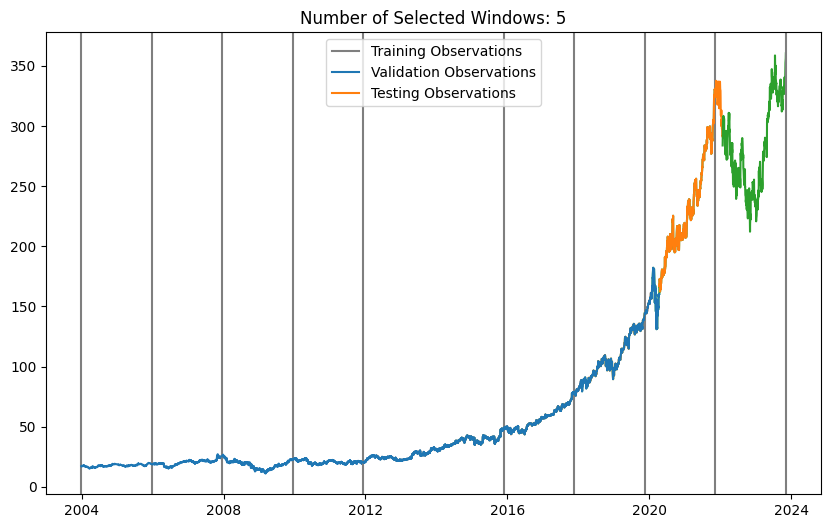

In [24]:
# Plot windows' intervals and count numbers of windows
plot_generator = sliding_window(windowed_df)
plt.figure(figsize=(10,6))
windows_cnt = 0
for train, vali, test in plot_generator:
    plt.axvline(train.index[0], color="tab:gray")
    plt.plot(train.index, train["Price"], color="tab:blue")
    plt.plot(vali.index, vali["Price"], color="tab:orange")
    plt.plot(test.index, test["Price"], color="tab:green")
    plt.axvline(test.index[-1], color="tab:gray")
    windows_cnt += 1;

plt.title(f"Number of Selected Windows: {windows_cnt}")
plt.legend([
    "Training Observations",
    "Validation Observations",
    "Testing Observations",
])
plt.show()

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

def compute_accuracy_and_cm(y_val, y_test, y_pred):
    """
    Computes the accuracy score and the confusion matrix
    For simplicity, zero price change are considered as positive
    """

    sz = len(y_test)
    y_ref = np.append(y_val[-1], y_test)
    
    y_test_label = np.zeros(sz)
    y_pred_label = np.zeros(sz)

    acc = 0
    for i in range(sz):
        y_test_label[i] = 1 if ((y_test[i] - y_ref[i]) >= 0) else -1
        y_pred_label[i]  = 1 if ((y_pred[i] - y_ref[i]) >= 0) else -1

        if y_test_label[i] == y_pred_label[i]:
            acc += 1

    cm = confusion_matrix(y_true=y_test_label, y_pred=y_pred_label)
    return acc/sz, cm

In [26]:
from matplotlib import patches
patienceSelected = 50

def plot_loss_curve(history, model_idx, i, patience=patienceSelected):
    """
    Plots the loss curve for the model fitting process
    """
    
    logs = history.history
    aux_list = [(val, i) for i, val in enumerate(logs['combine_metric'])]
    best = min(aux_list)
    last = len(logs['combine_metric'])

    plt.figure(figsize=(10,6))
    plt.title(f"Loss Curve for: Model {model_idx}, Window {i}")
    plt.plot(logs["loss"], label="Training Loss")
    plt.plot(logs["val_loss"], label="Validation Loss")
    plt.plot(logs["combine_metric"], label="Combined Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")

    plt.axvline(last-1, color="tab:gray", ymax=0.3, linestyle='--')
    plt.axvline(last-patience-1, color="tab:gray", ymax=0.3, linestyle='--')
    plt.axvline(best[1], color="tab:red", ymax=0.3, linestyle='--')
    
    red_patch = patches.Patch(
        color="tab:red", 
        label=f"best epoch={best[1]}")
    
    gray_patch = patches.Patch(
        color="tab:gray", 
        label=f"Early Stop Limits ({last-patience-1}, {last-1})")

    handles, labels = plt.gca().get_legend_handles_labels()
    handles.extend([red_patch, gray_patch])

    plt.legend(handles=handles, loc="upper right")
    plt.show()

In [27]:
def plot_predictions(dates, ys, metrics, model_idx, i):
    """
    Plots the predicted curve, comparing with observation data
    """
    
    dates_train, dates_vali, dates_test = dates
    y_train, y_vali, y_test, y_result = ys
    rmse, mae, mape, r2, acc = metrics
    
    plt.figure(figsize=(10,6))
    plt.plot(dates_train, y_train)
    plt.plot(dates_vali, y_vali)
    plt.plot(dates_test, y_test)
    plt.plot(dates_test, y_result)
    plt.legend([
        "Training Observations",
        "Validation Observations",
        "Testing Observations",
        "Testing Predictions"
    ])
    plt.title(f"Model {model_idx}, Window {i}, RMSE={rmse:.3f}, \
               MAE={mae:.3f}, MAPE={mape:.3f}, R2={r2:.3f}" )
    plt.show()

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(cm, metrics, model_idx, i):
    """
    Plots the confusion matrix for the price change classification
    """

    rmse, mae, mape, r2, acc = metrics

    cm_plt = ConfusionMatrixDisplay(cm, 
                                    display_labels=["Positive", "Negative"])
    cm_plt.plot()
    cm_plt.ax_.set(
        title= f"Model {model_idx}, Window {i}, Accuracy={acc:.3f}",
        xlabel= "Predicted Price Change",
        ylabel= "Actual Price Change"
    )
    plt.show()

In [29]:
from keras.callbacks import EarlyStopping , Callback, ModelCheckpoint
import h5py 
 
class CombineCallback(Callback):
    def __init__(self, **kargs):
        super(CombineCallback, self).__init__(**kargs)
    def on_epoch_end(self, epoch, logs={}):
        f = 0.2 # f=vali_factor, 80% training loss, 20% validation loss
        logs['combine_metric'] = f*logs['val_loss']+(1-f)*logs['loss']

combined_cb = CombineCallback()
model_checkpoint = ModelCheckpoint(
    filepath="Models/tmp_best_model.h5", 
    monitor="combine_metric", 
    mode="min", 
    save_best_only=True, 
    save_weights_only=True,
    verbose=False
)
earlyStop = EarlyStopping(monitor="combine_metric", 
                          min_delta=0, 
                          patience=patienceSelected, 
                          mode="min", 
                          verbose=False)

## Main Function

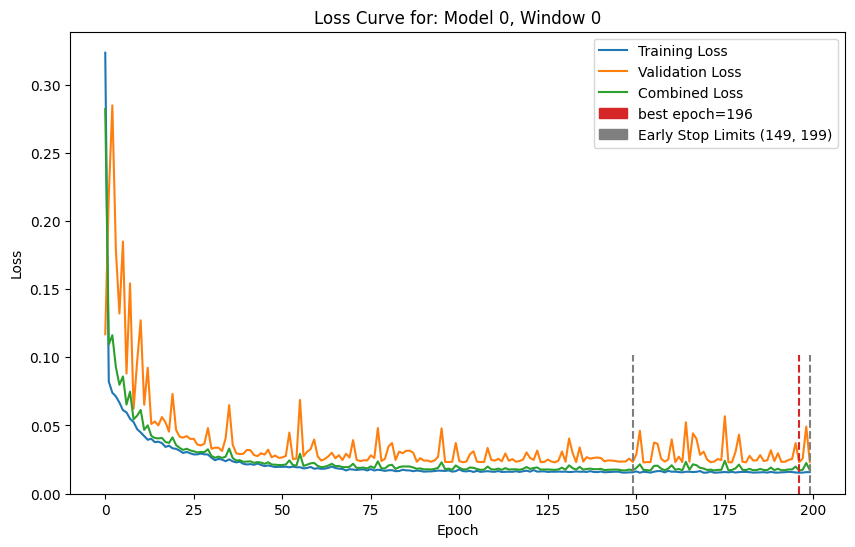

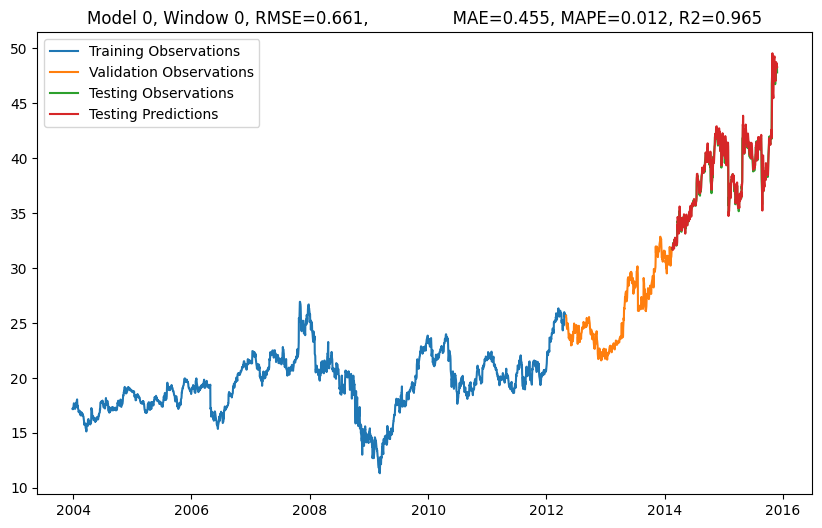

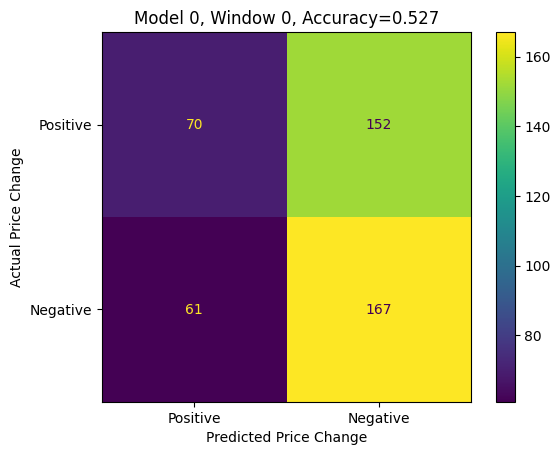

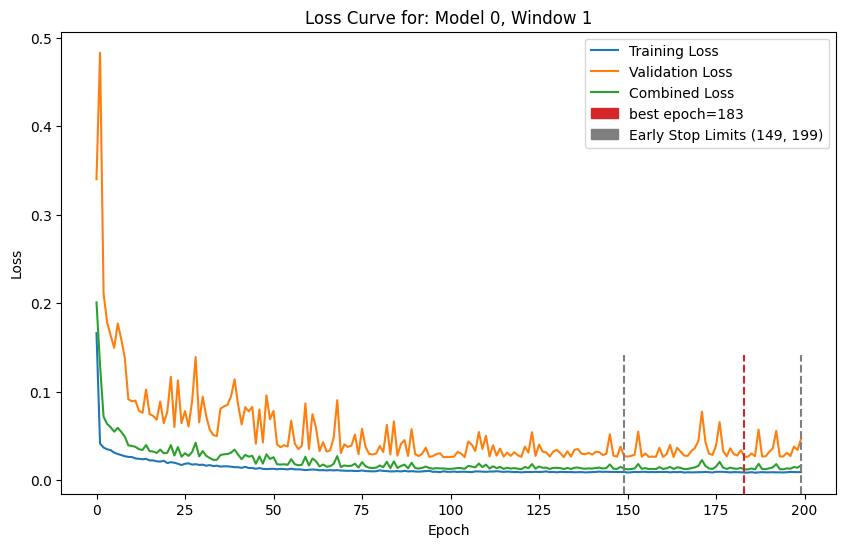

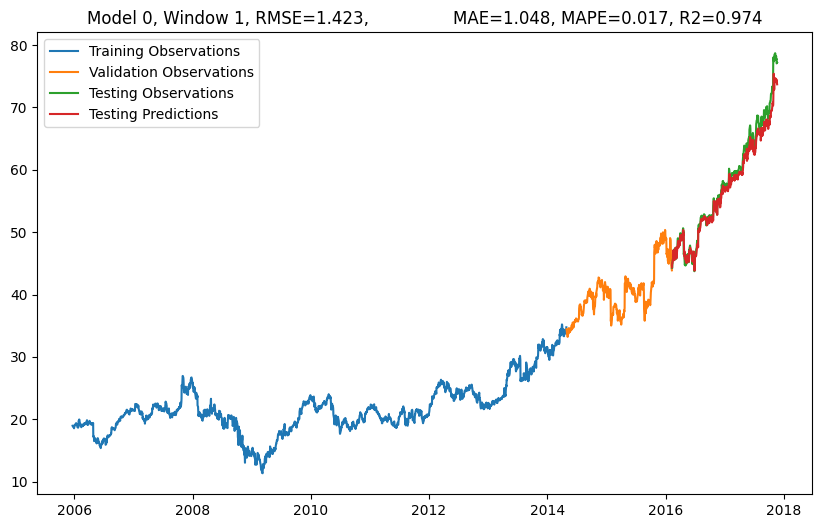

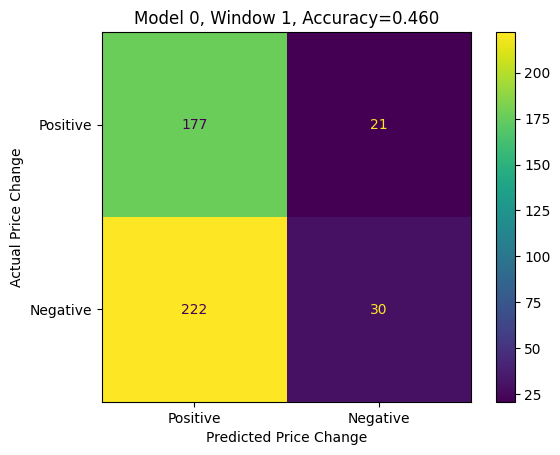

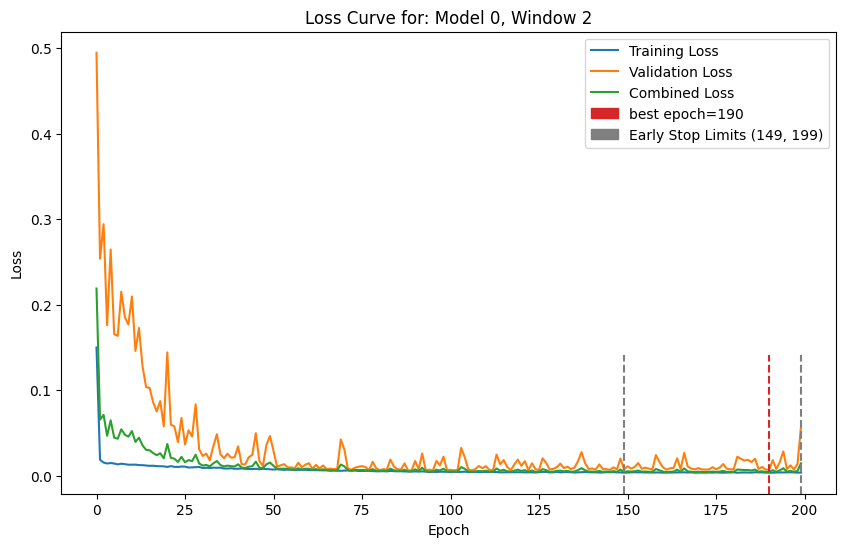

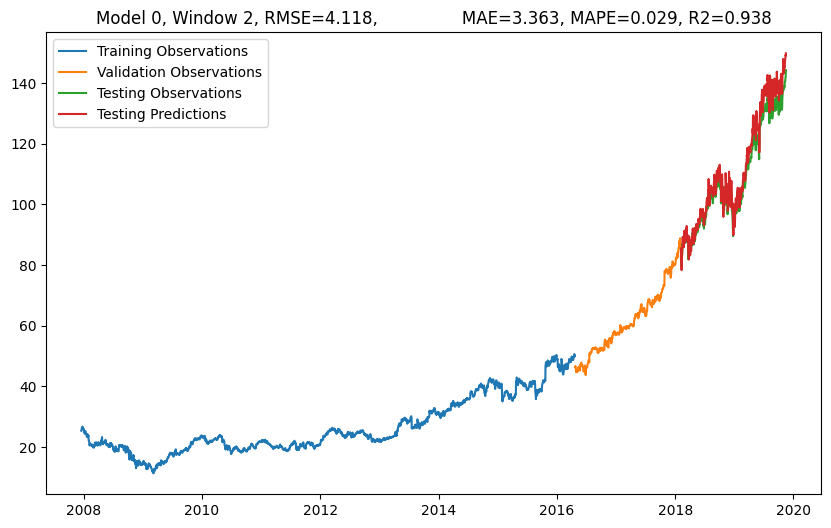

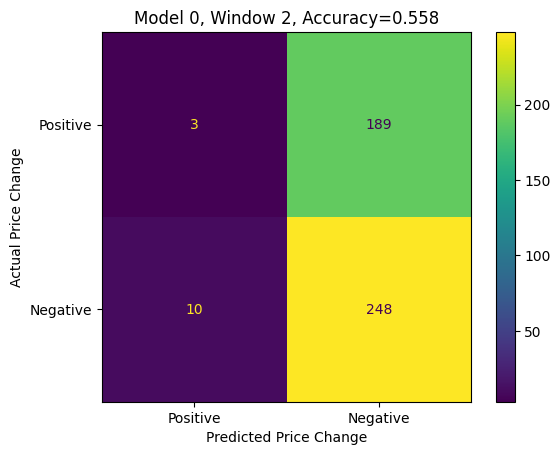

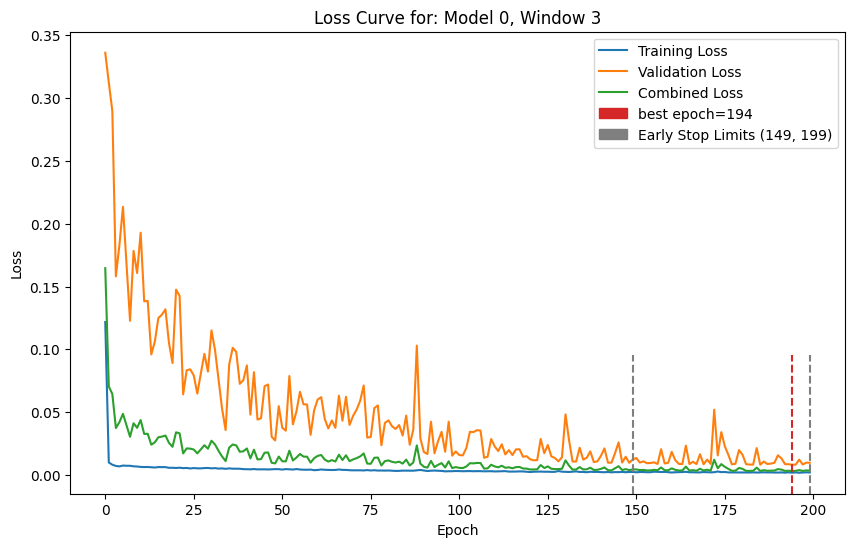

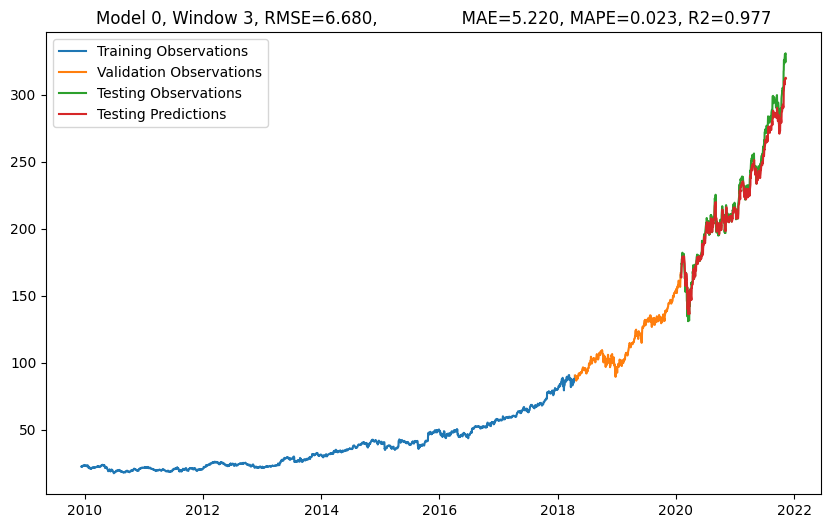

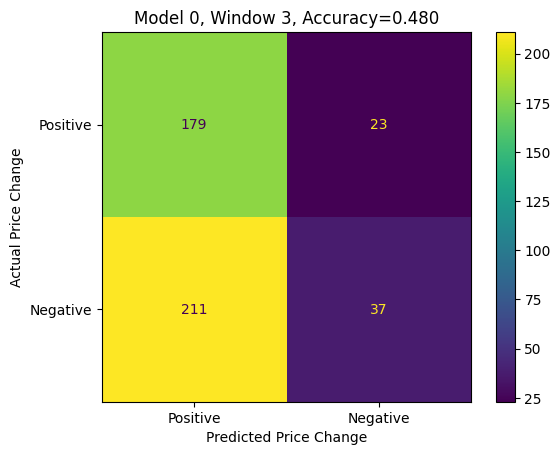

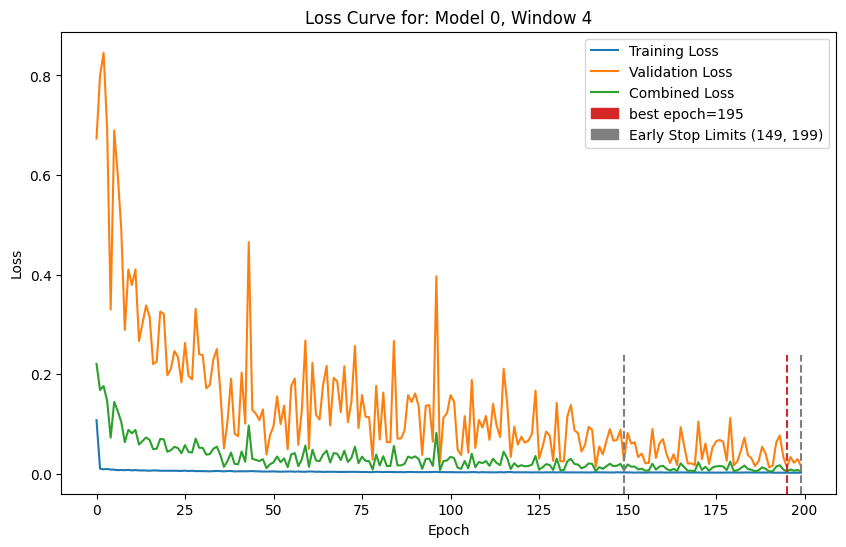

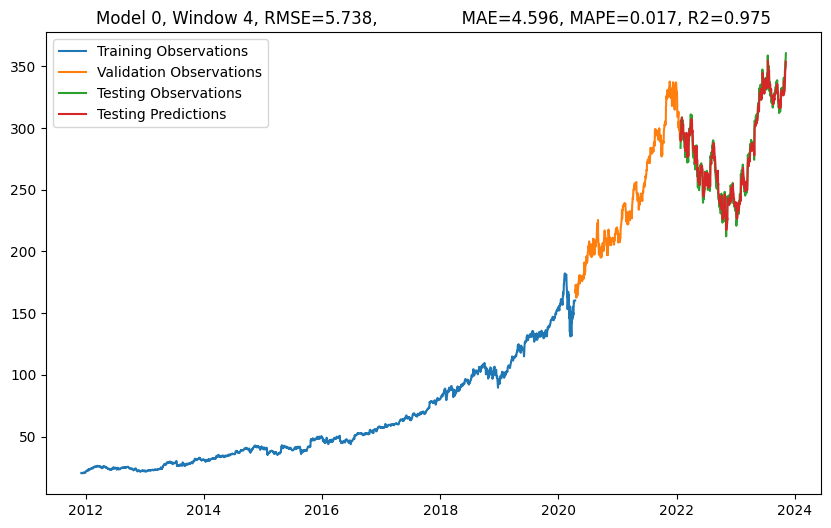

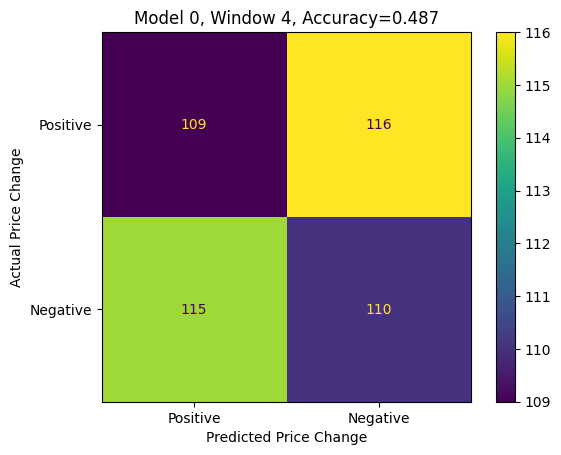

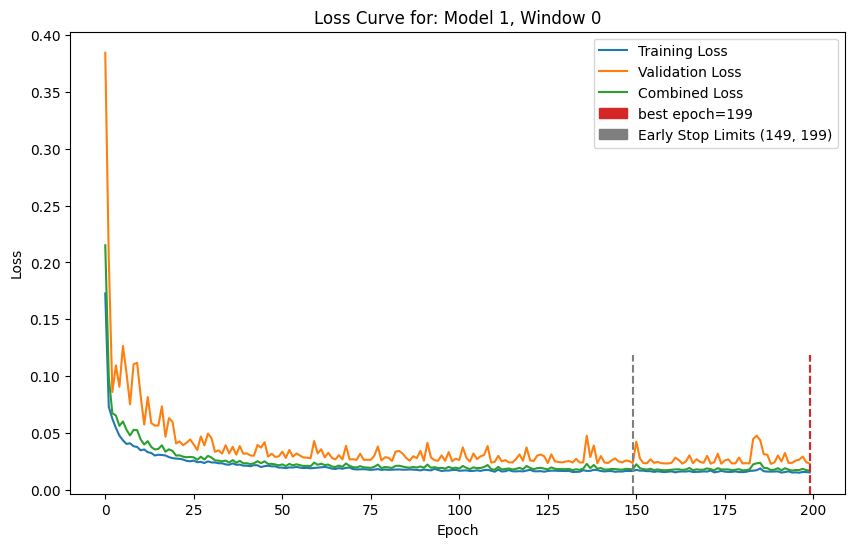

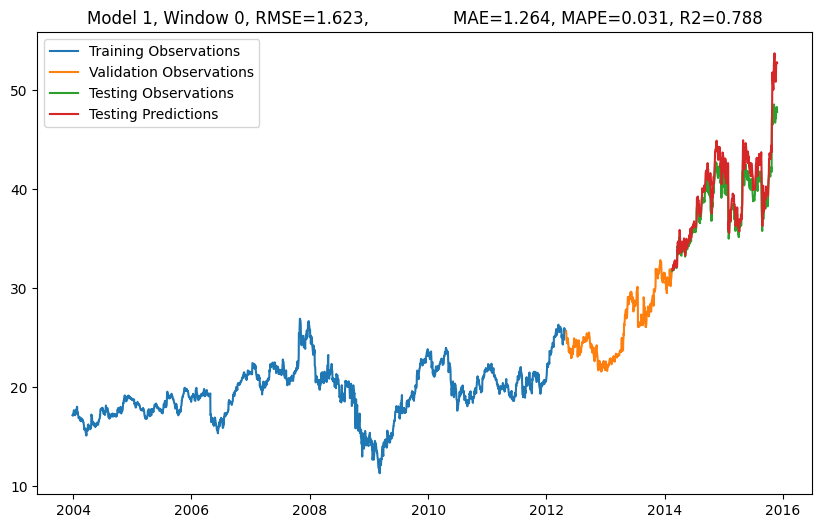

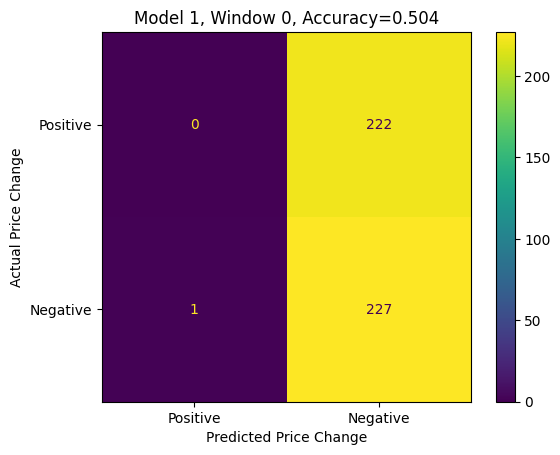

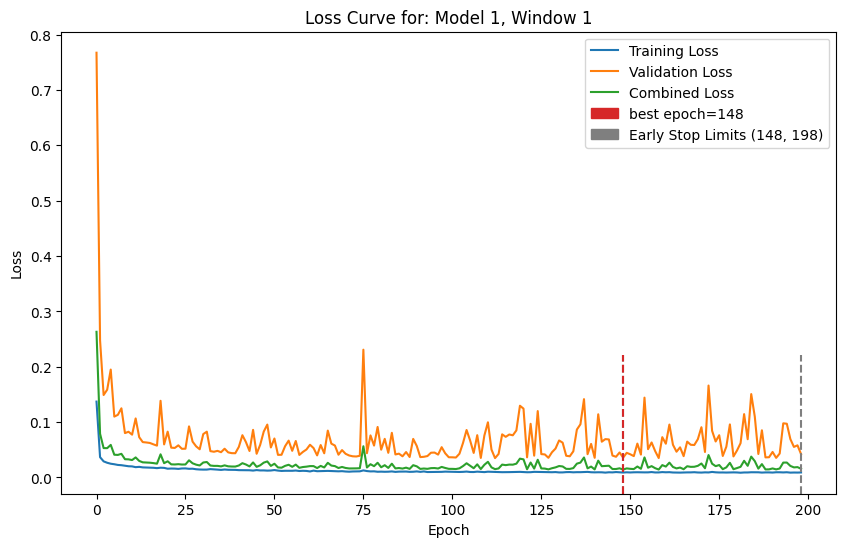

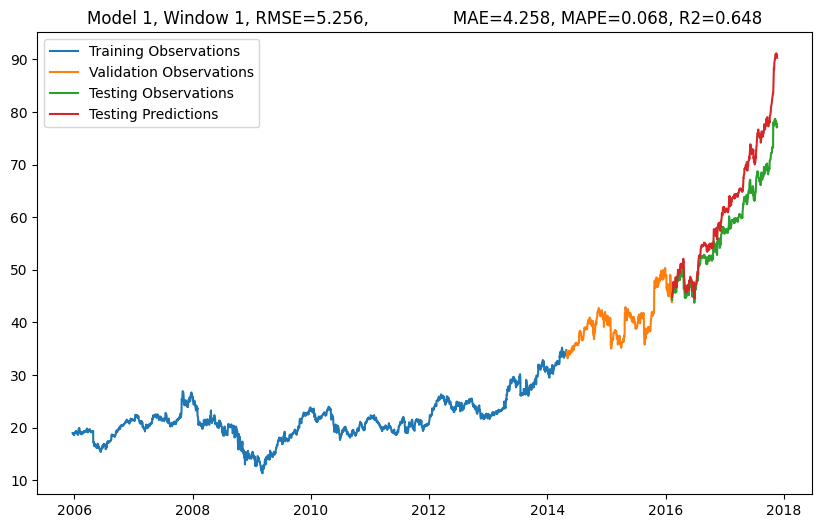

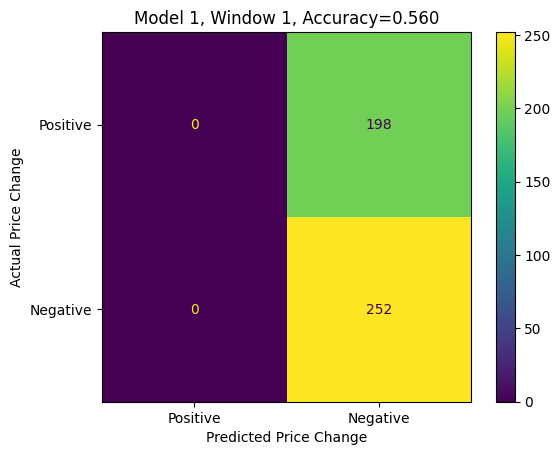

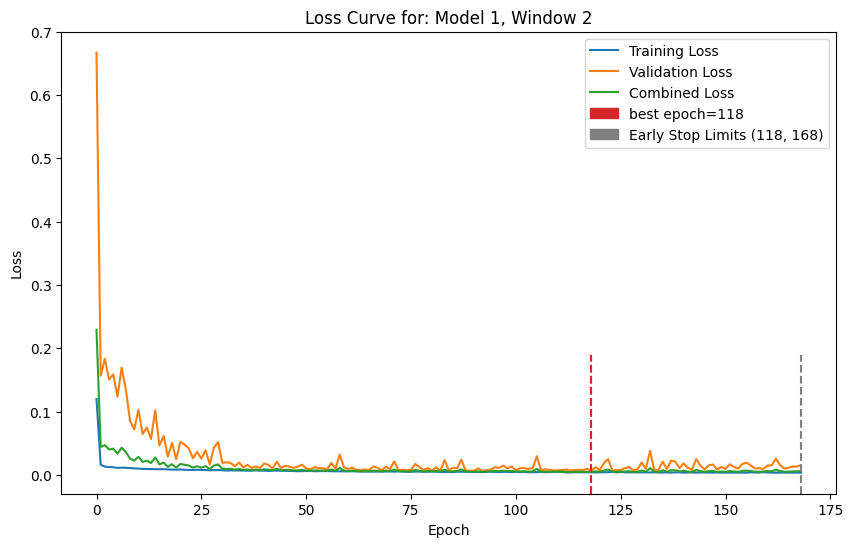

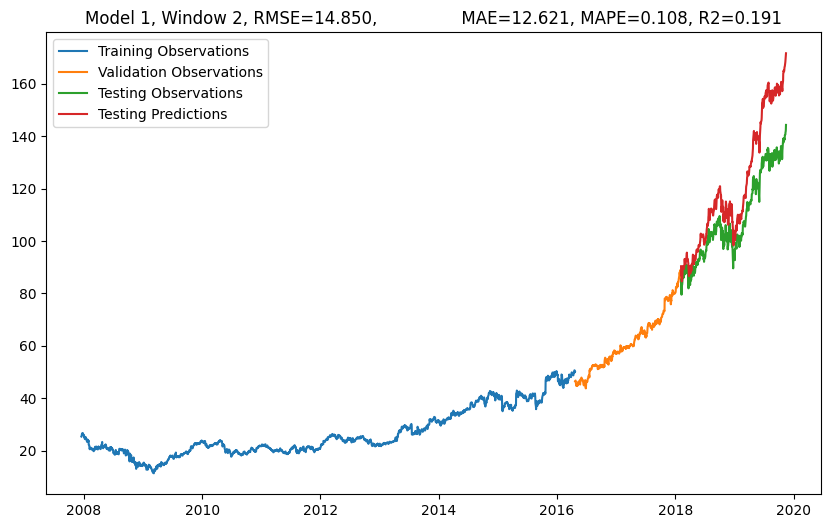

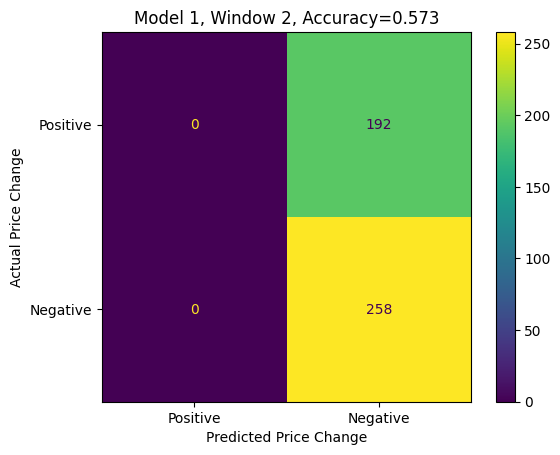

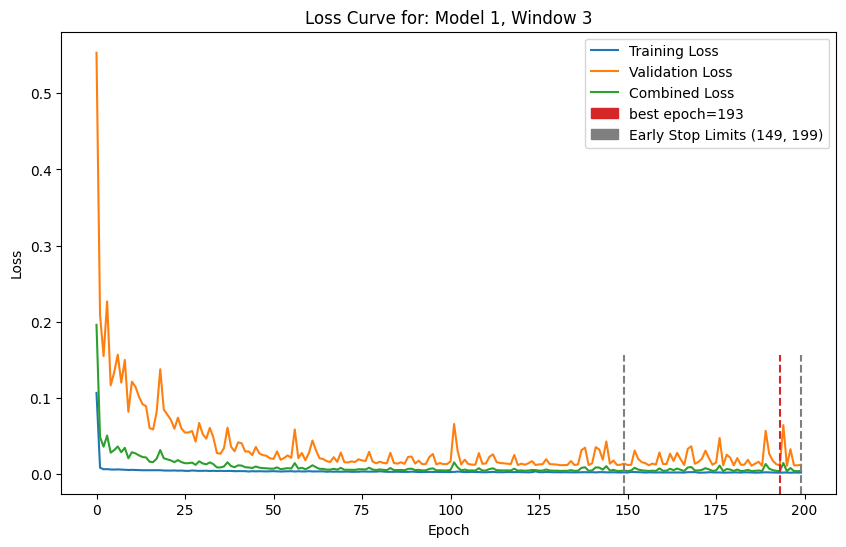

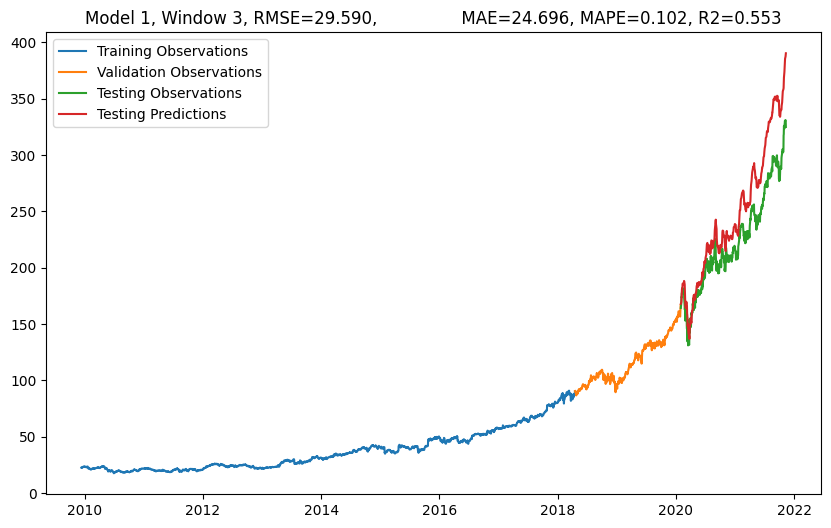

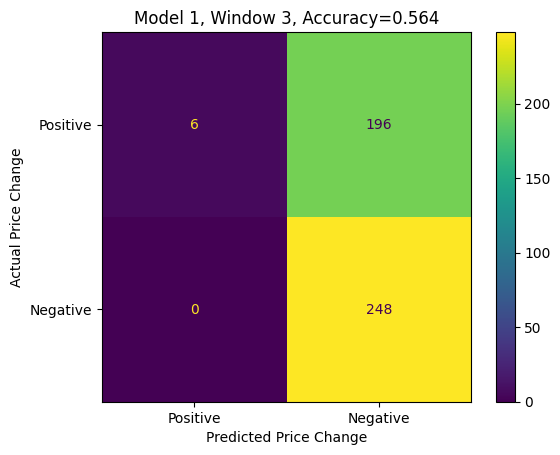

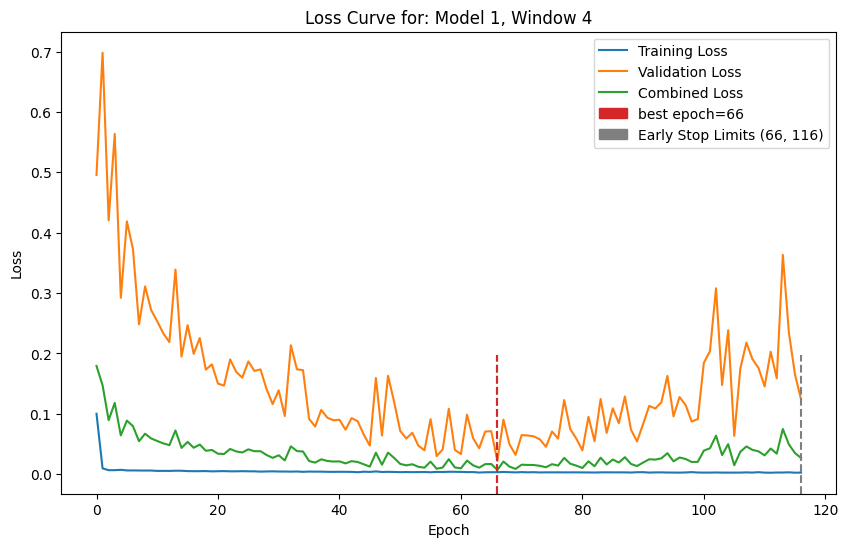

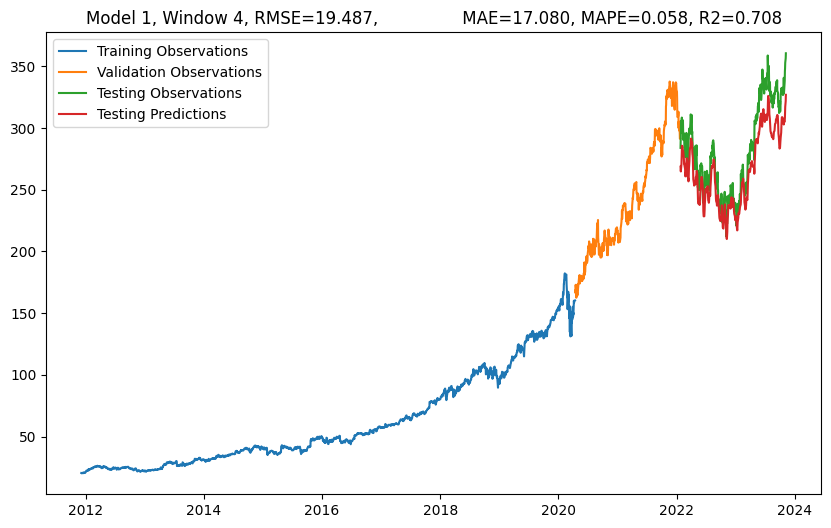

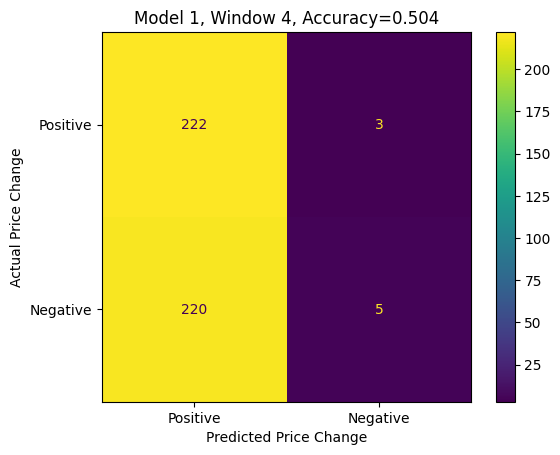

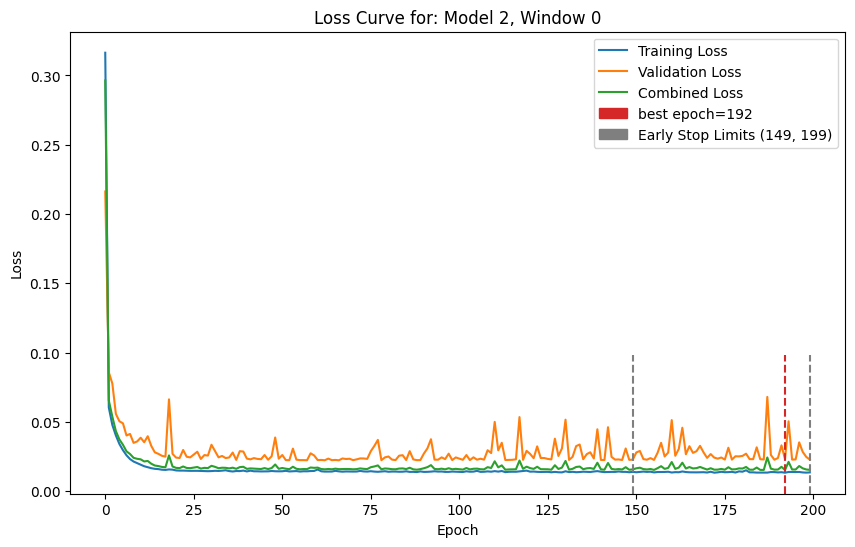

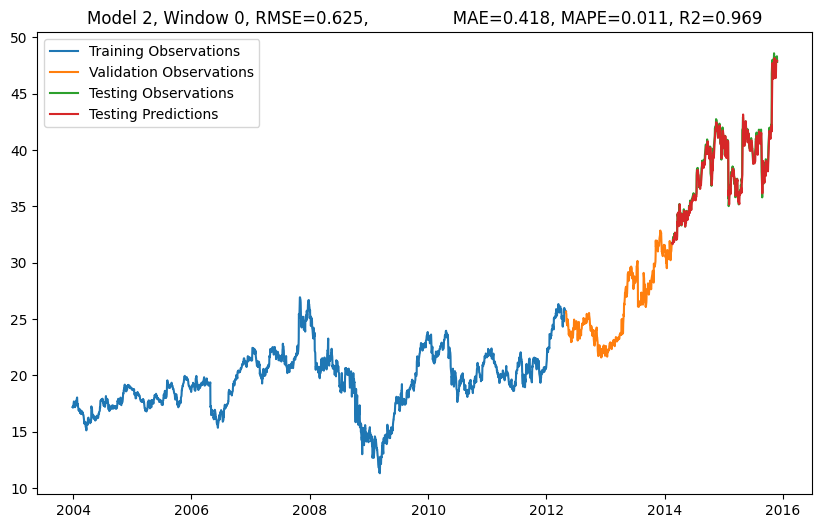

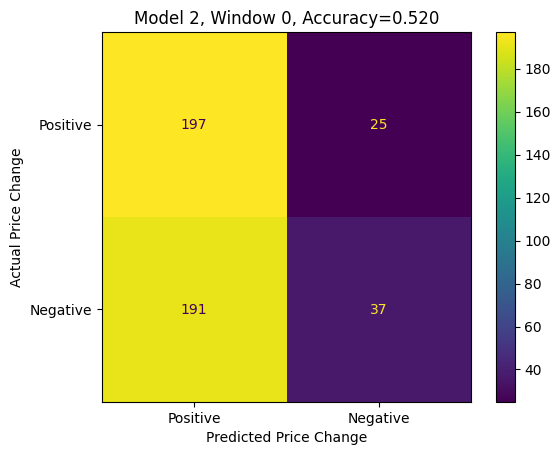

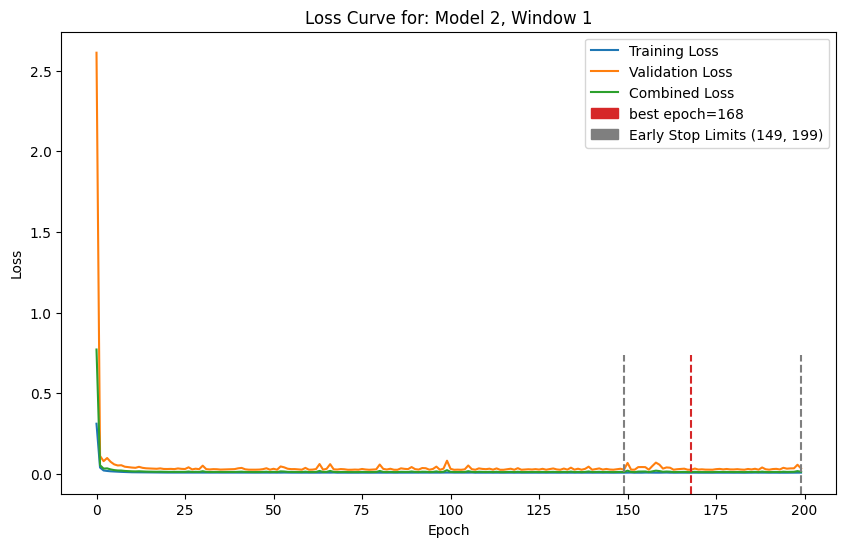

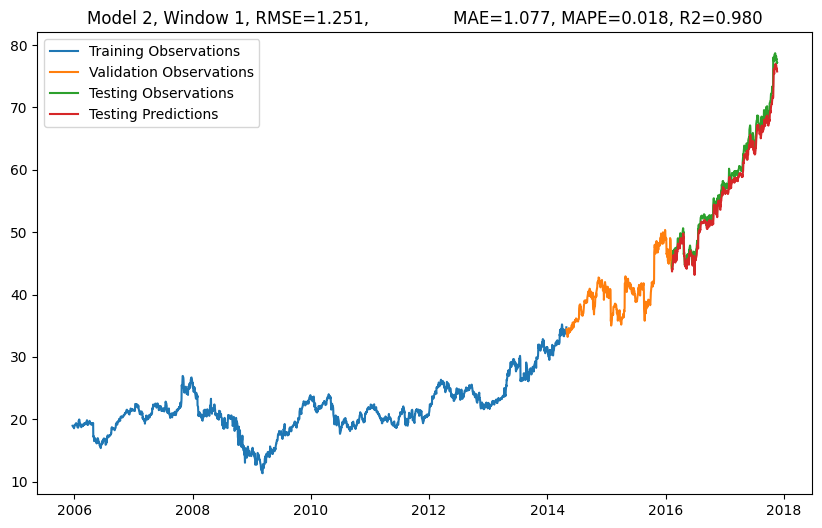

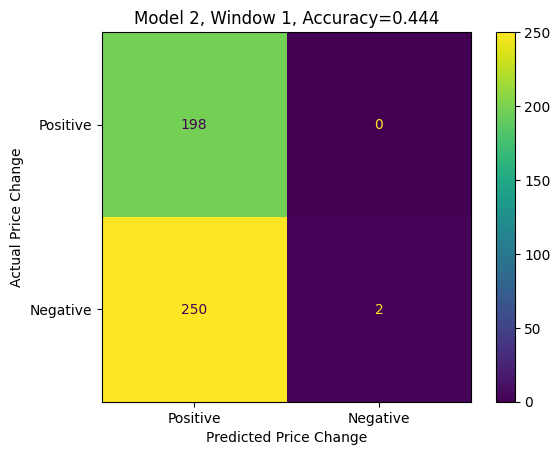

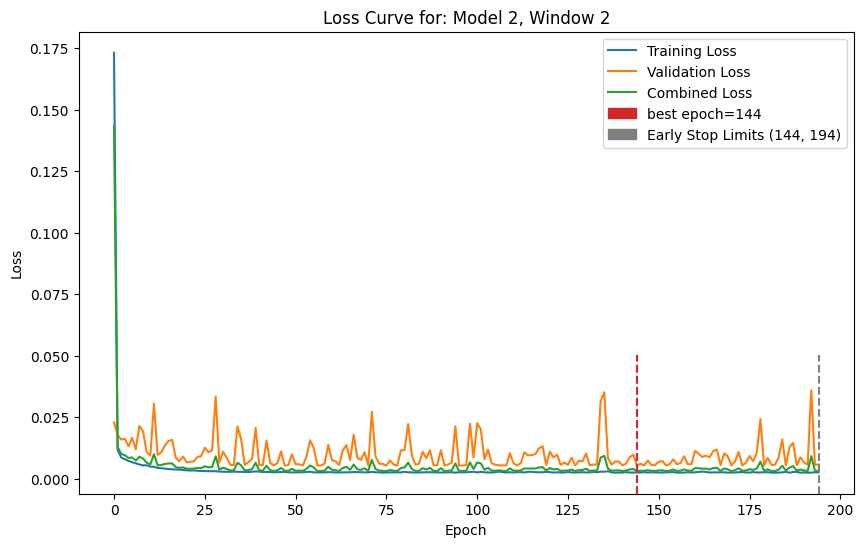

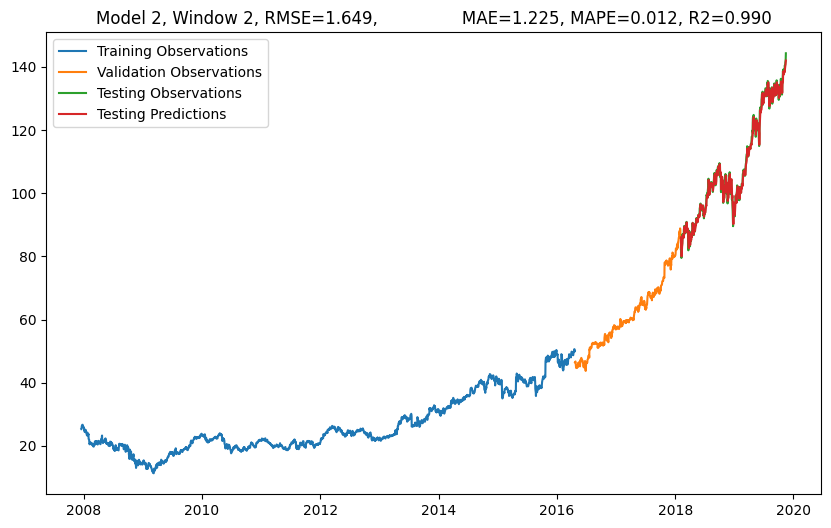

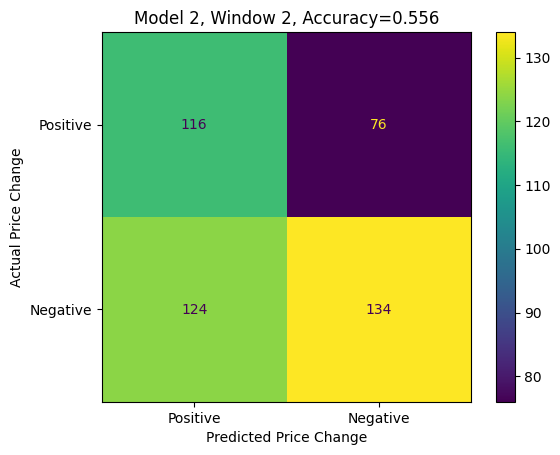

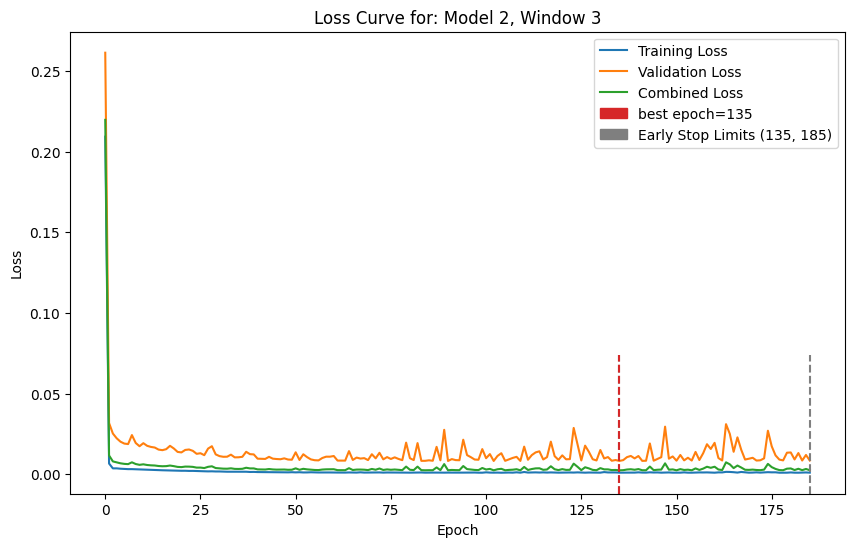

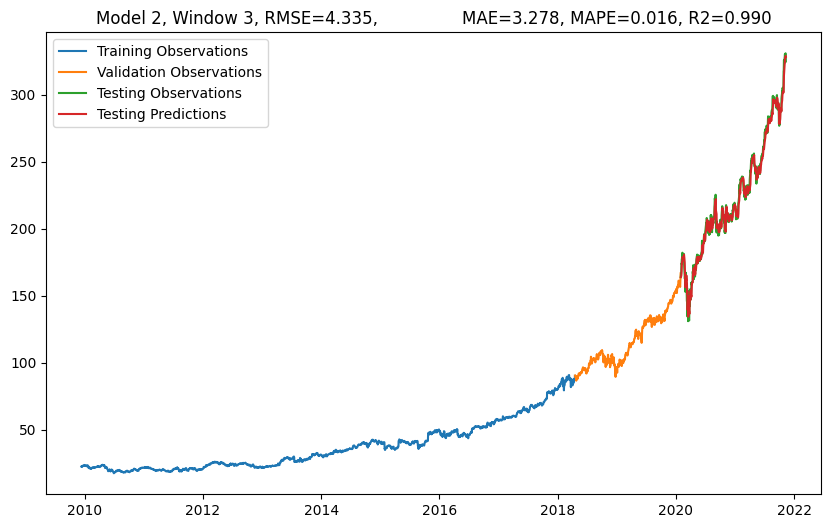

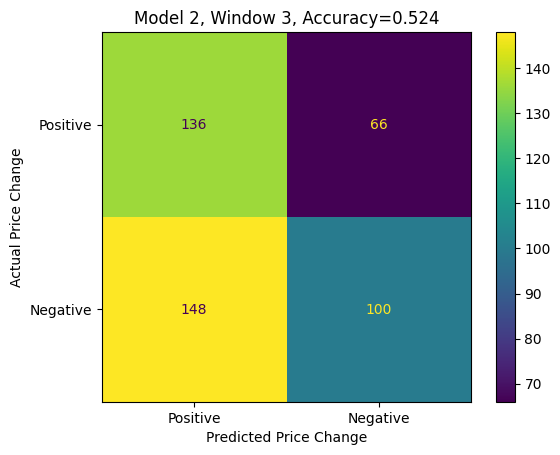

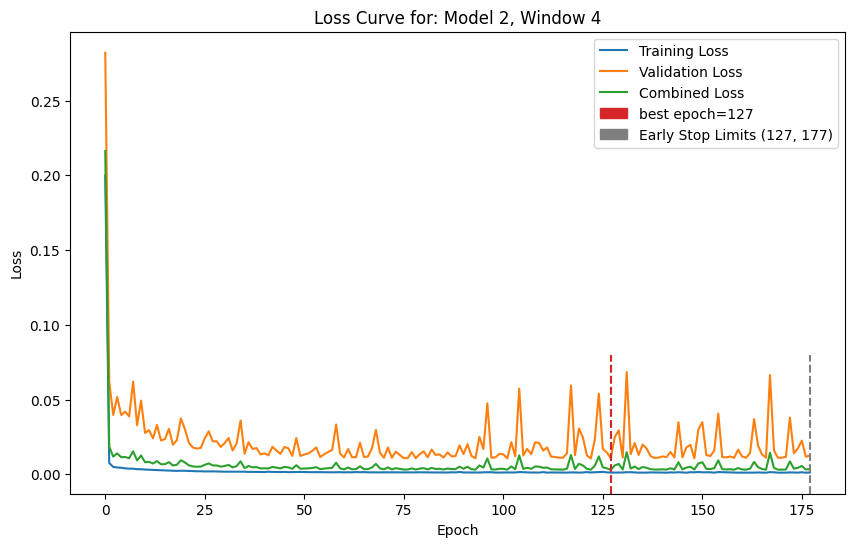

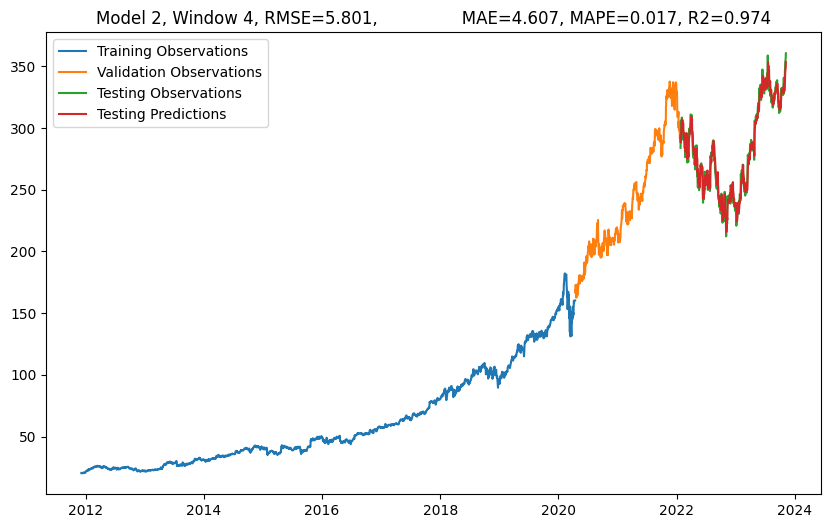

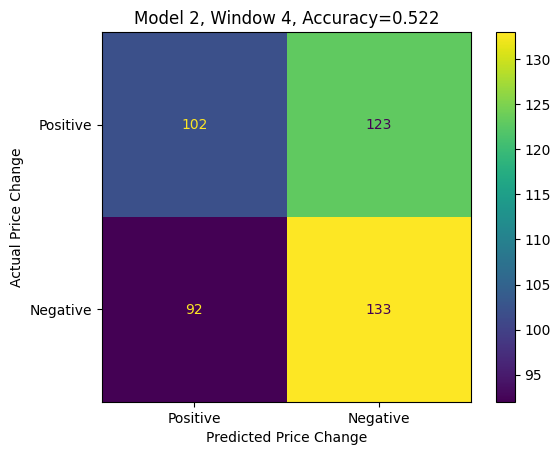

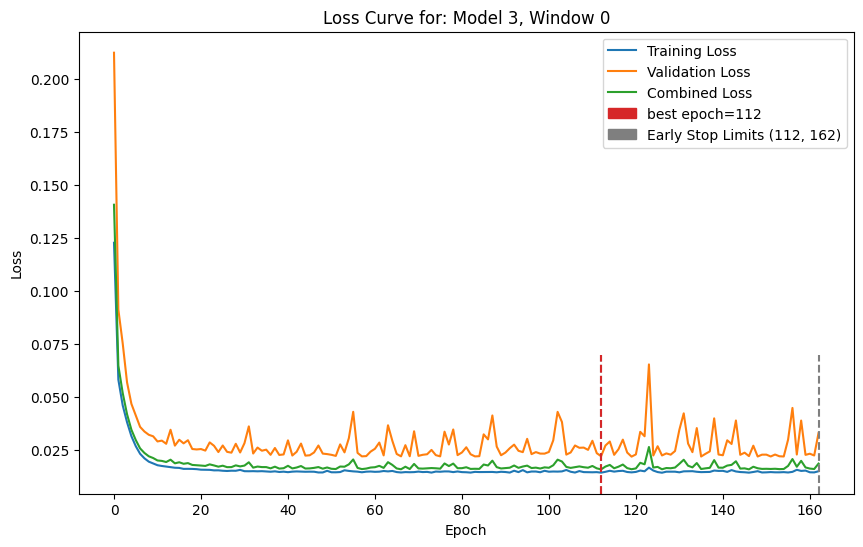

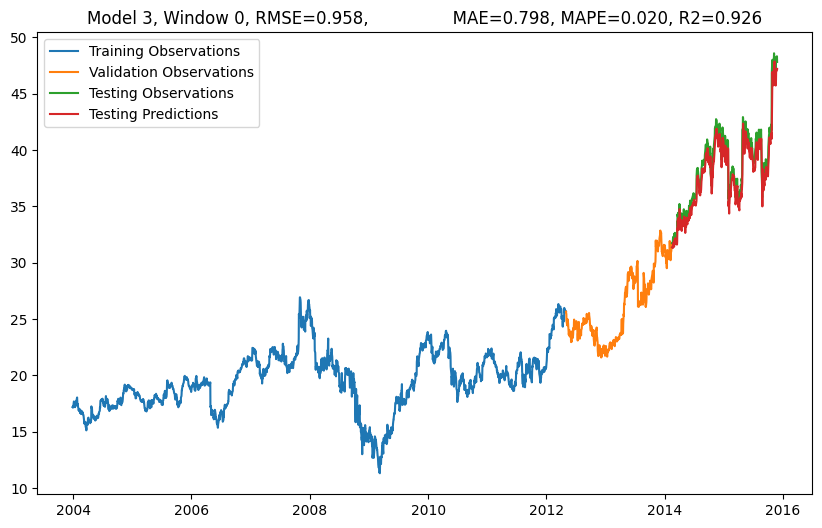

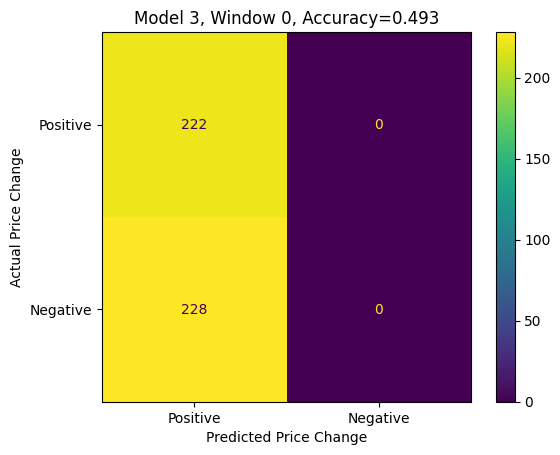

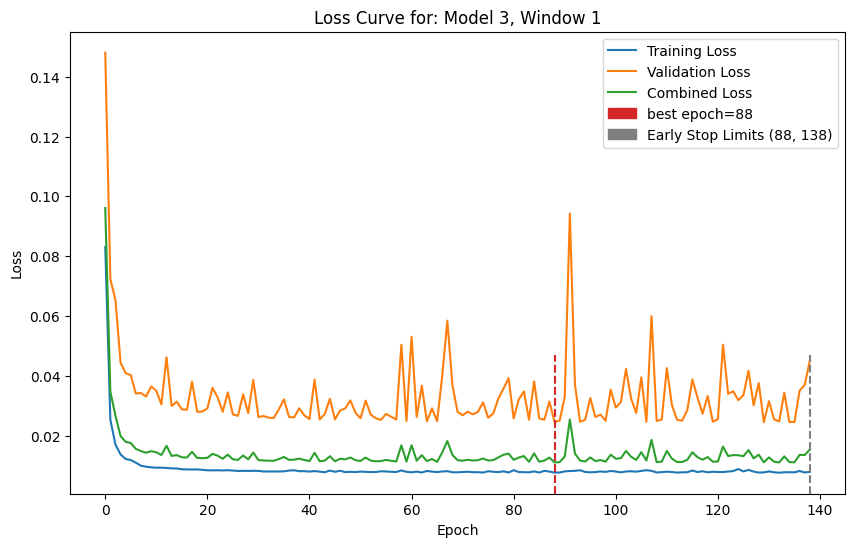

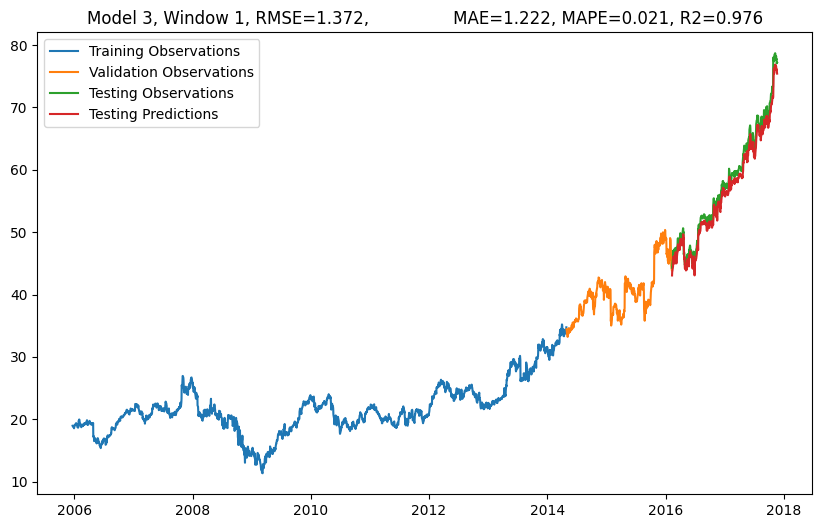

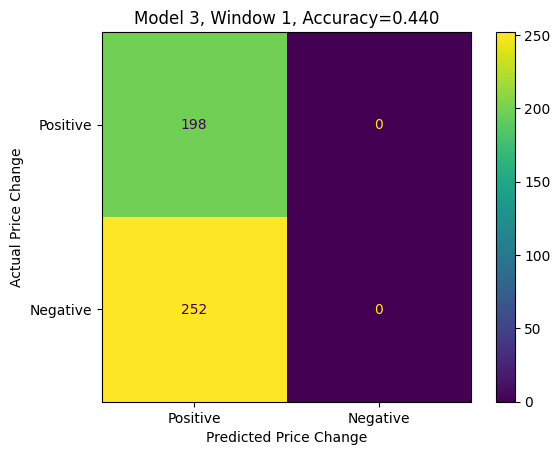

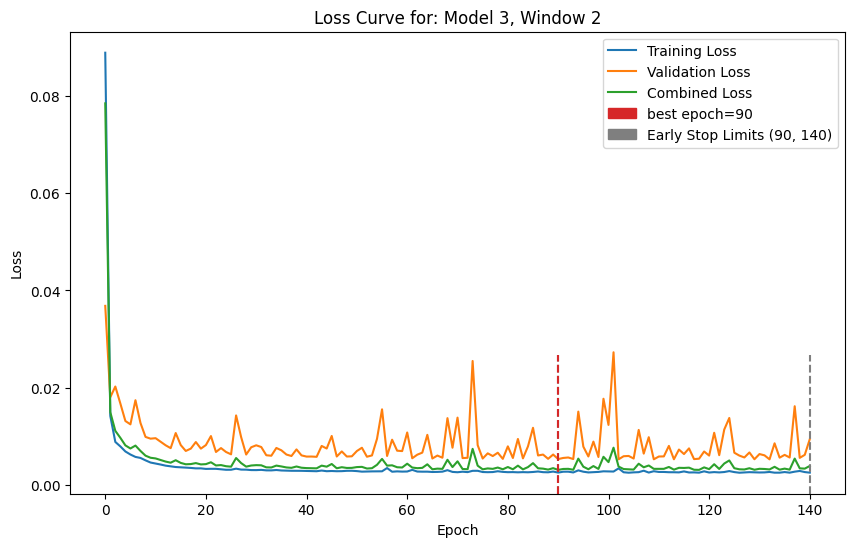

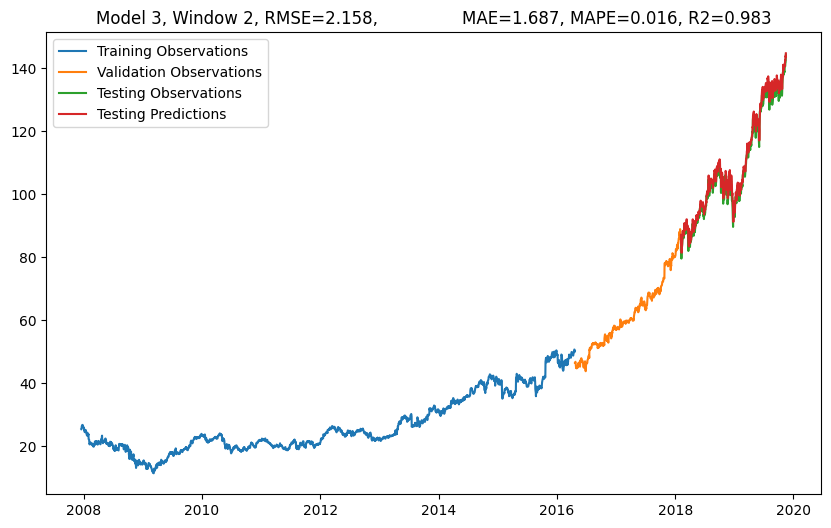

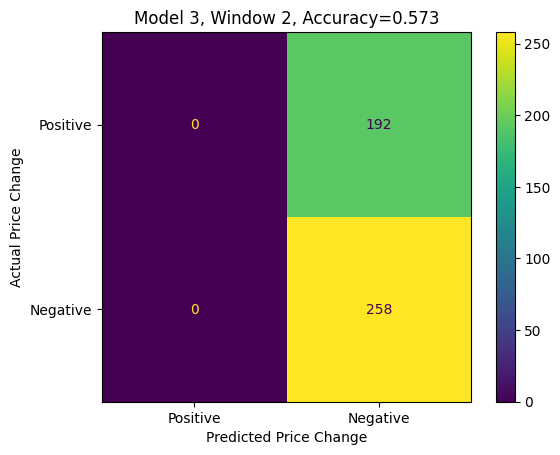

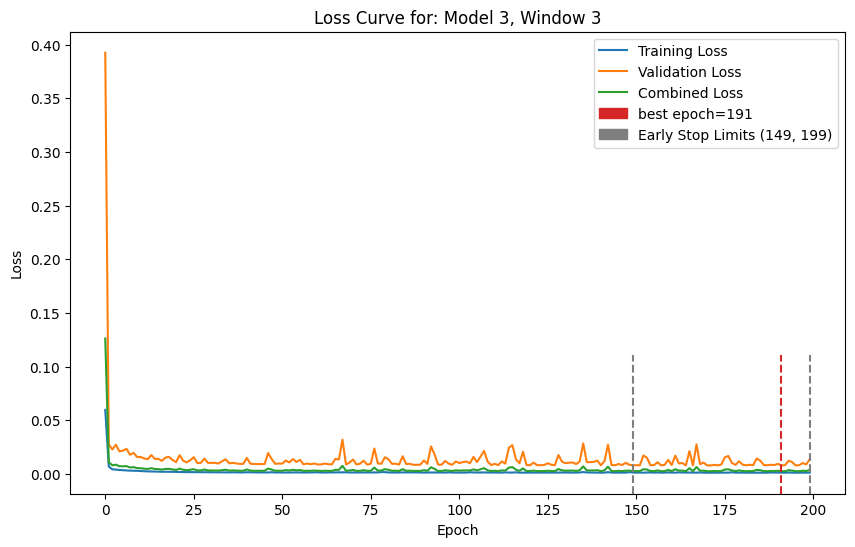

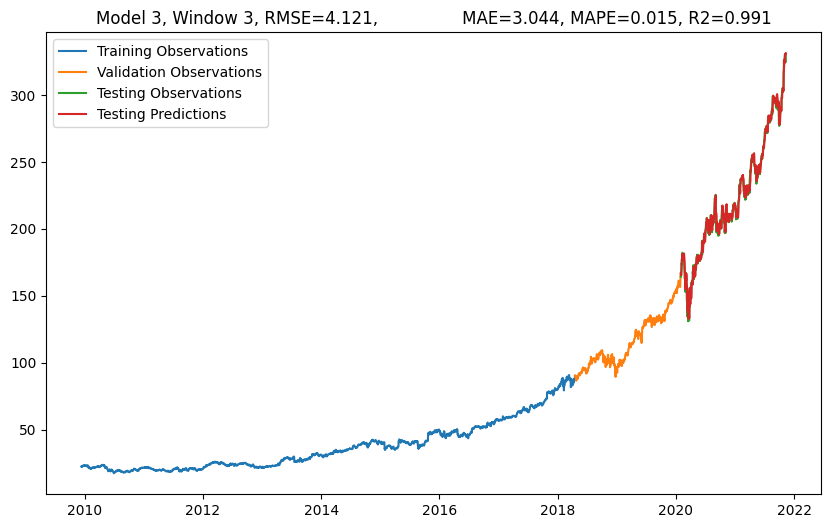

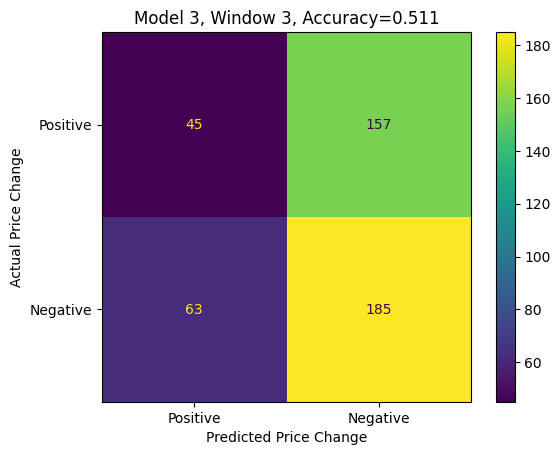

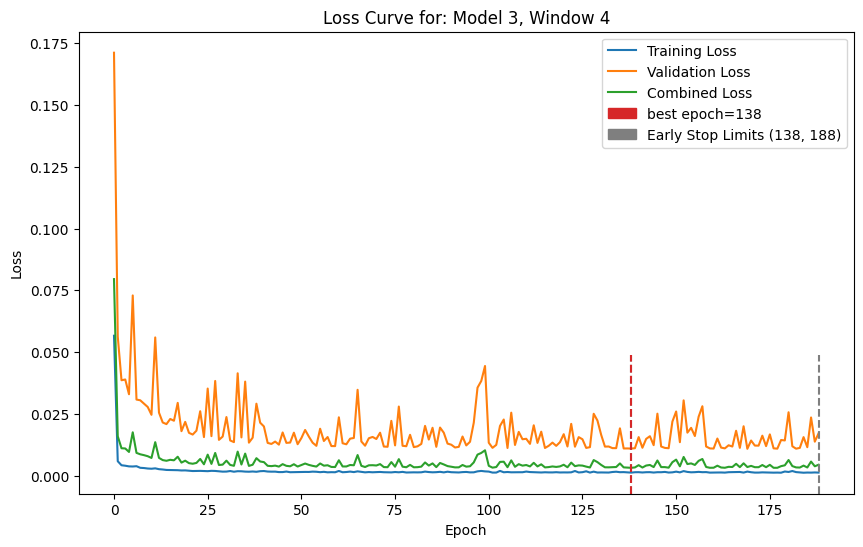

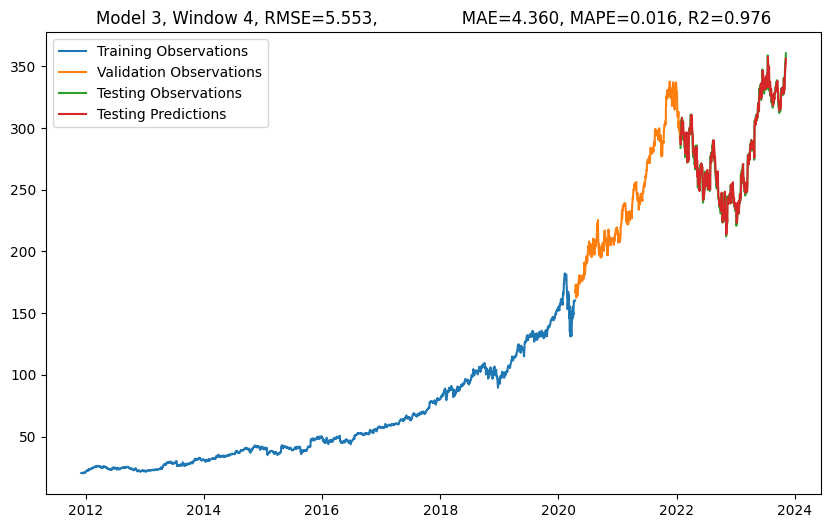

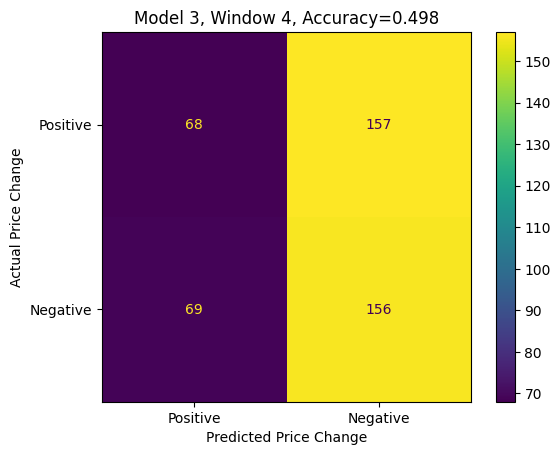

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from tensorflow.keras.optimizers import Adam

def cross_validation(model, generator, model_idx, flag_plot=0):
    """
    Performs Cross validation for all models and all sliding windows

    Calculates the cross validation score:
        ("RMSE", "MAE", "MAPE", "R2", "Accuracy");

    Accuracy is computed by classifying if the relative price change 
    for day i was positive or negative
    """

    cv_score = pd.DataFrame(columns=["RMSE", "MAE", "MAPE", "R2", "Acc"])

    for i, (train, vali, test) in enumerate(generator):
        # Get Dates = [dates_train, dates_vali, dates_test]
        dates = [i.index for i in [train, vali, test]]

        # Scale data
        scaler, X_sc, y_sc = scale_data(train, vali, test)
        X_train_sc, X_vali_sc, X_test_sc = X_sc
        y_train_sc, y_vali_sc, y_test_sc = y_sc

        # Fit, save best model and Predict
        model.load_weights("Models/empty_model.h5", 
                           skip_mismatch=1, by_name=1)
        
        model.reset_states()
        history = model.fit(
            X_train_sc, y_train_sc,
            validation_data=(X_vali_sc, y_vali_sc),
            epochs=200, # maximum number of epochs
            batch_size=64, # better for jumping local minimas
            verbose=False,
            callbacks=[combined_cb, earlyStop, model_checkpoint]
        )
        model.load_weights("Models/tmp_best_model.h5",
                           skip_mismatch=1, by_name=1)
        
        preds_sc = model.predict(X_test_sc, verbose=False)

        # Descale data
        stacked_pred = np.hstack((X_test_sc, preds_sc))
        ys =  descale_data(train, vali, test, stacked_pred, scaler)
        [y_train, y_vali, y_test, y_result] = ys

        # Compute Metrics
        rmse = mean_squared_error(y_true=y_test, y_pred=y_result, squared=0)
        mae = mean_absolute_error(y_true=y_test, y_pred=y_result)
        mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_result)
        r2 = r2_score(y_true=y_test, y_pred=y_result)
        acc, cm = compute_accuracy_and_cm(y_vali, y_test, y_result)

        metrics = [rmse, mae, mape, r2, acc]

        # Plot All Curves and Metrics; Also loss curves
        if flag_plot == 2:
            plot_loss_curve(history, model_idx, i)
            plot_predictions(dates, ys, metrics, model_idx, i)
            plot_confusion_matrix(cm, metrics, model_idx, i)

        # Plot last 5 Curves and Metrics; Also bad fits
        elif (flag_plot == 1 and ((i >= (windows_cnt - 5)) or (r2 < 0) )):
            plot_loss_curve(history, model_idx, i)
            plot_predictions(dates, ys, metrics, model_idx, i)
            plot_confusion_matrix(cm, metrics, model_idx, i)

        # Append Result
        cv_score.loc[len(cv_score)] = metrics

    return cv_score

# For each model, perform a cross validation training,
# plot graphs and compute metrics if wanted
cv_scores = []
for i, model in enumerate(models):
    model.compile(
        loss="mean_squared_error",
        optimizer=Adam(learning_rate=0.0001)
    )   
    model.save_weights("Models/empty_model.h5")
    generator = sliding_window(windowed_df)
    cv_score = cross_validation(model, generator, i, 1)
    cv_scores.append(cv_score)

# Results

In [31]:
# Output summary (mean, std, min, max)
for i, cv_score in enumerate(cv_scores):
    print(f"Model {i}")
    print(cv_score.describe(), "\n\n")

Model 0
           RMSE       MAE      MAPE        R2       Acc
count  5.000000  5.000000  5.000000  5.000000  5.000000
mean   3.724088  2.936173  0.019477  0.965756  0.502222
std    2.627913  2.114026  0.006818  0.016313  0.039378
min    0.661280  0.454766  0.011674  0.937804  0.460000
25%    1.423016  1.047510  0.016657  0.964879  0.480000
50%    4.118081  3.362705  0.016885  0.974187  0.486667
75%    5.738474  4.596236  0.022689  0.974666  0.526667
max    6.679592  5.219650  0.029481  0.977243  0.557778 


Model 1
            RMSE        MAE      MAPE        R2       Acc
count   5.000000   5.000000  5.000000  5.000000  5.000000
mean   14.161279  11.983777  0.073484  0.577736  0.541333
std    11.218012   9.520979  0.031880  0.232463  0.034015
min     1.623440   1.263547  0.031191  0.191245  0.504444
25%     5.256038   4.257768  0.058236  0.553426  0.504444
50%    14.849876  12.621232  0.067933  0.647840  0.560000
75%    19.487487  17.080351  0.101633  0.707841  0.564444
max    29.589

In [32]:
# Section by Parameter
metrics = ["RMSE", "MAE", "MAPE", "R2", "Acc"]

evaluation = {
    "RMSE": {},
    "MAE": {},
    "MAPE": {},
    "R2": {},
    "Acc": {},
}

for model_idx, cv_score in enumerate(cv_scores):
    for param in metrics:
        evaluation[param][f"Model {model_idx}"] = cv_score[param].mean()

def plot_metric(param, logScale=False):
    if logScale:
        plt.figure(figsize=(10,6))
        plt.title(param + " in Log Scale")
        plt.bar(list(evaluation[param].keys()), list(evaluation[param].values()), color="tab:orange")
        plt.xlabel("Models")
        plt.ylabel("Metrics Value")
        plt.yscale('log')
        plt.show()

    else:
        plt.figure(figsize=(10,6))
        plt.title(param)
        plt.bar(list(evaluation[param].keys()), list(evaluation[param].values()))
        plt.xlabel("Models")
        plt.ylabel("Metrics Value")
        plt.show()

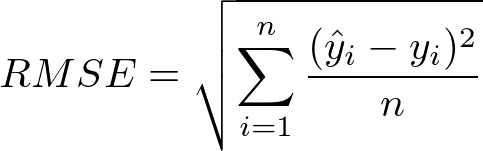

In [33]:
display.Image("Images/RootMeanSquareError.png")

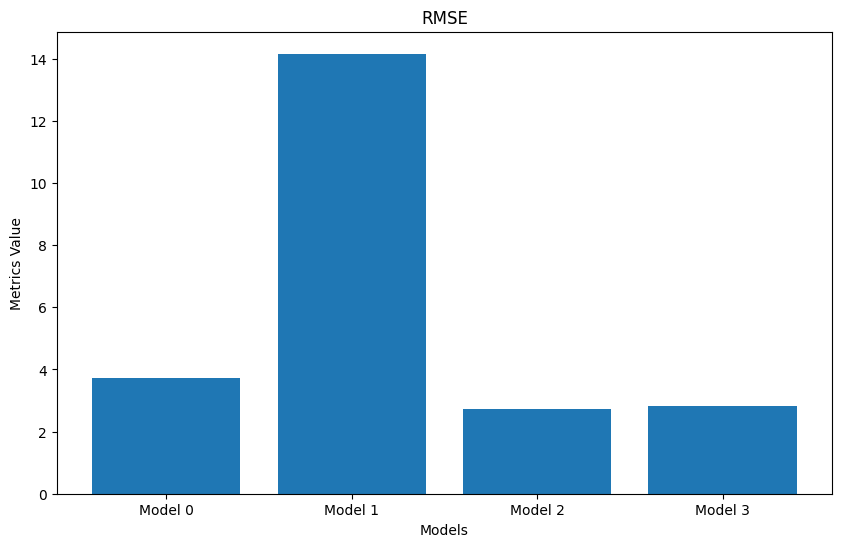

In [34]:
plot_metric("RMSE")

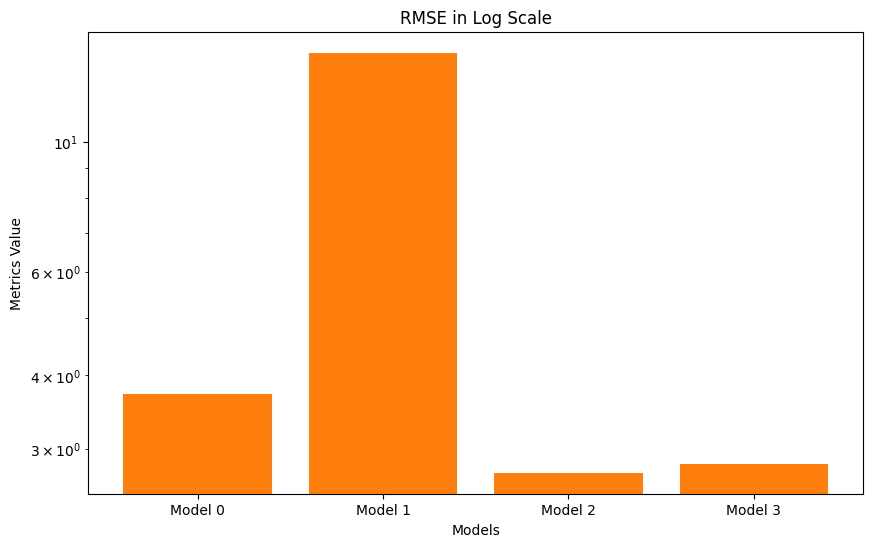

In [35]:
plot_metric("RMSE", 1)

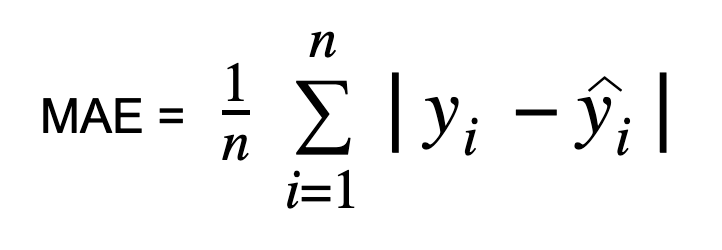

In [36]:
display.Image("Images/MeanAbsoluteError.png")

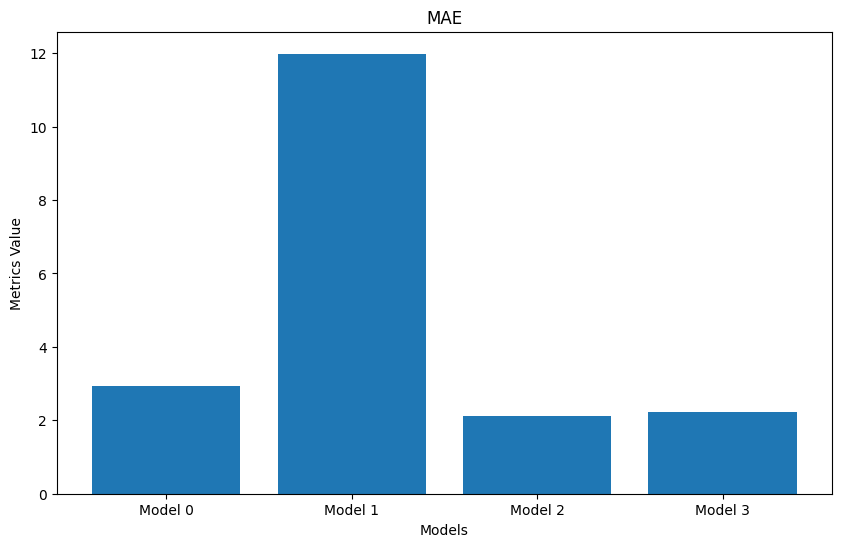

In [37]:
plot_metric("MAE")

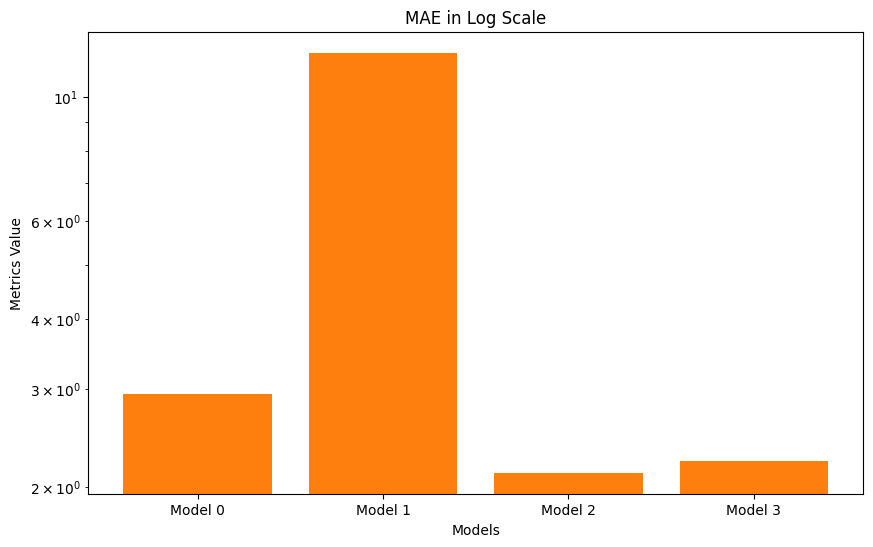

In [38]:
plot_metric("MAE", 1)

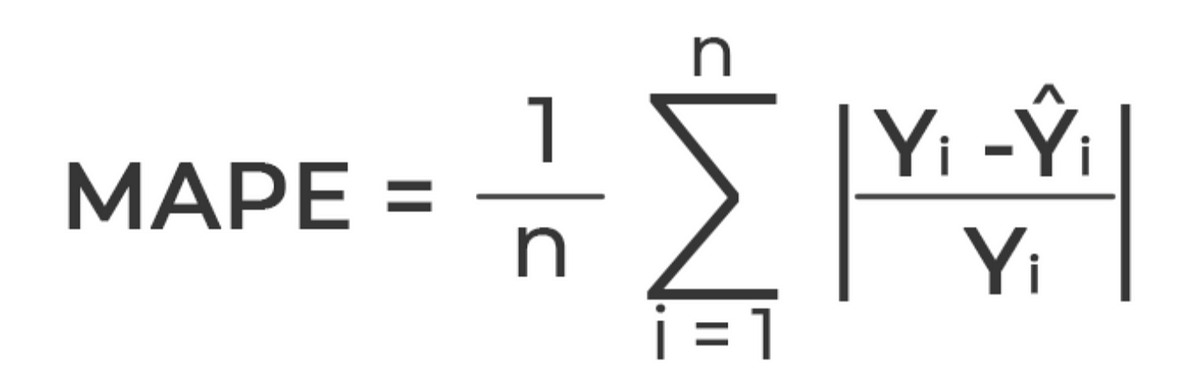

In [39]:
display.Image("Images/MeanAbsolutePercentageError.png")

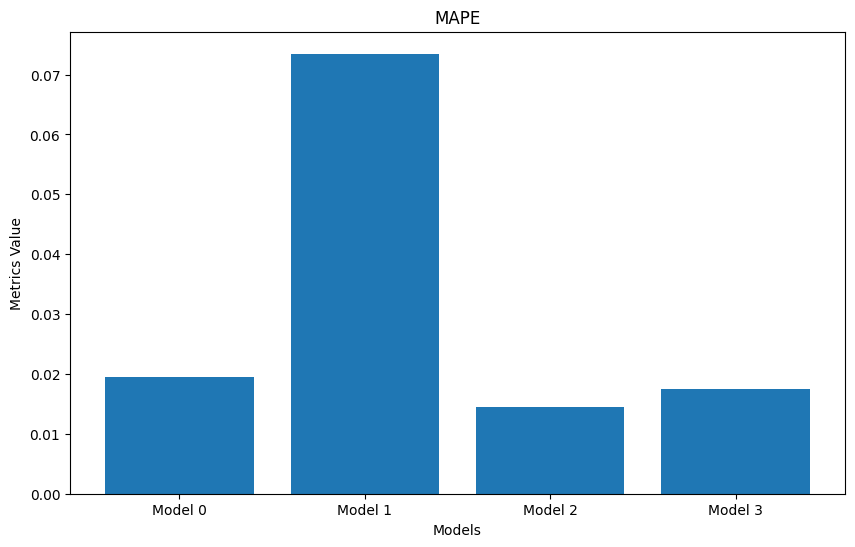

In [40]:
plot_metric("MAPE")

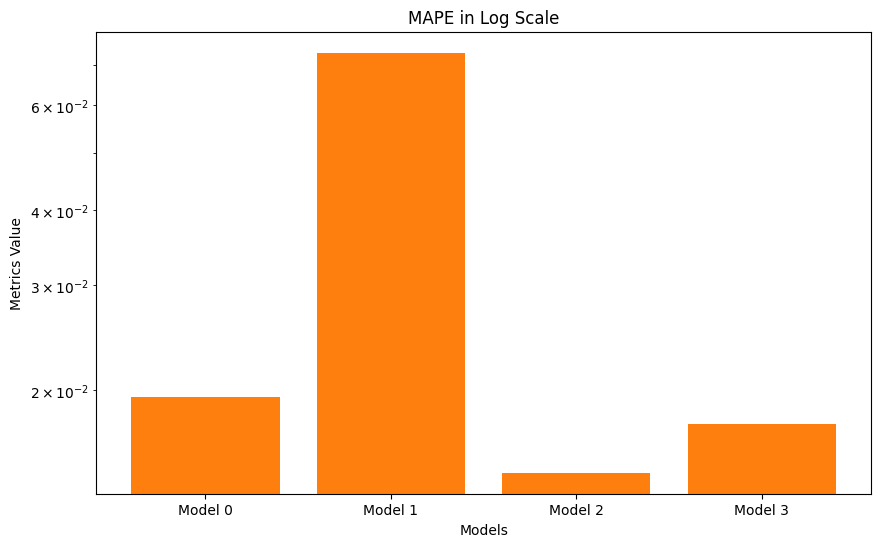

In [41]:
plot_metric("MAPE", 1)

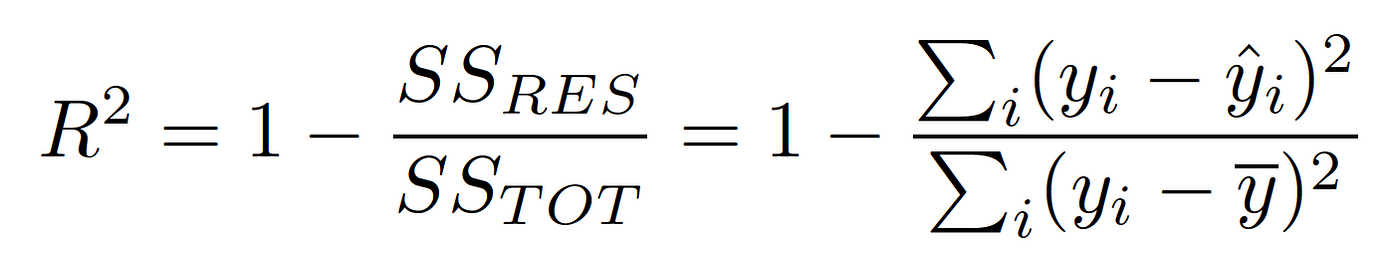

In [42]:
display.Image("Images/R2-DeterminationCoefficient.png")

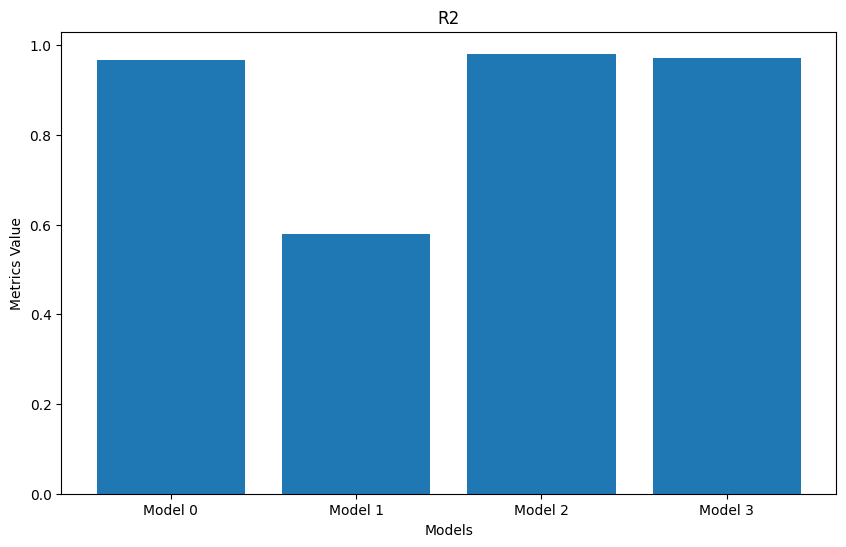

In [43]:
plot_metric("R2")

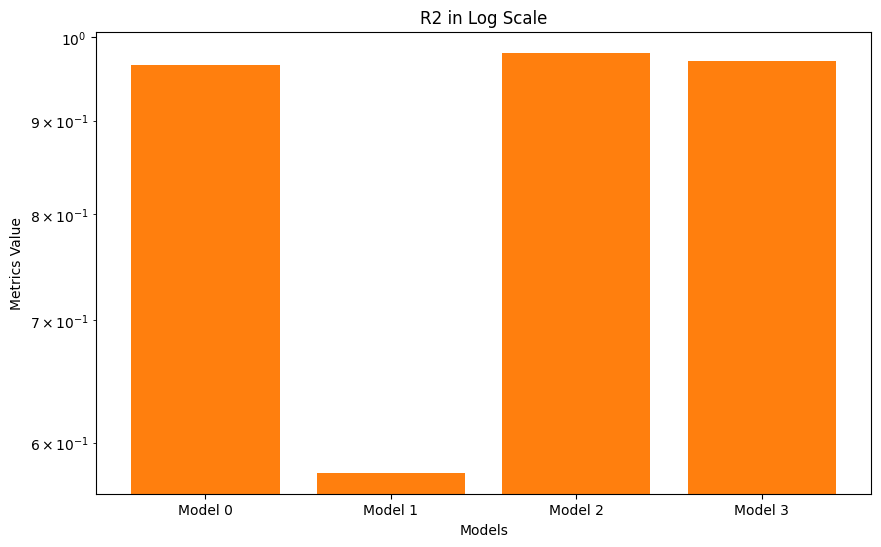

In [44]:
plot_metric("R2", 1)

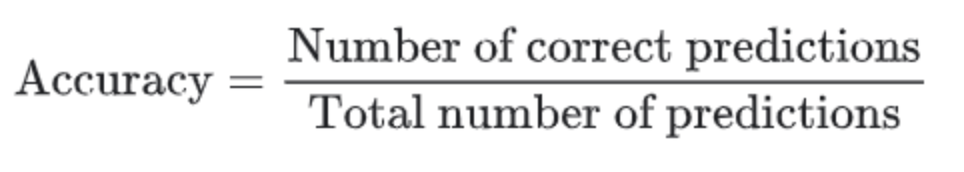

In [45]:
display.Image("Images/Accuracy.png")

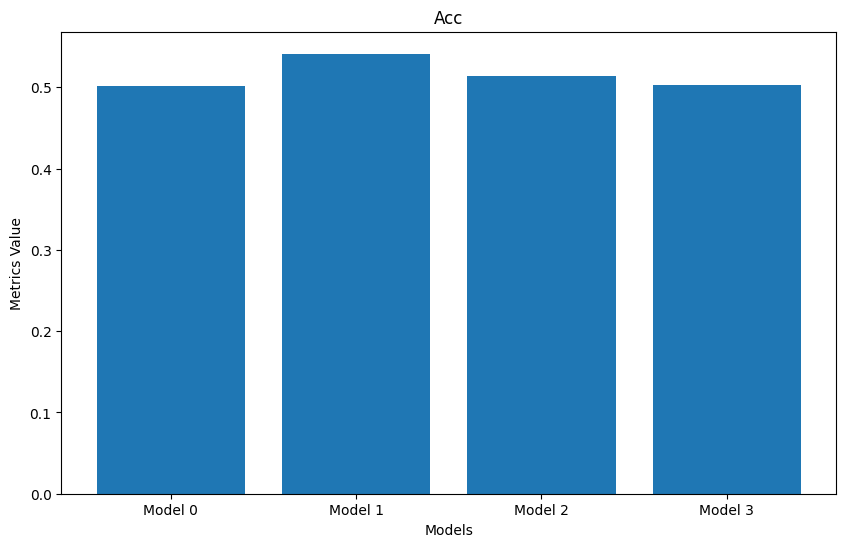

In [46]:
plot_metric("Acc")

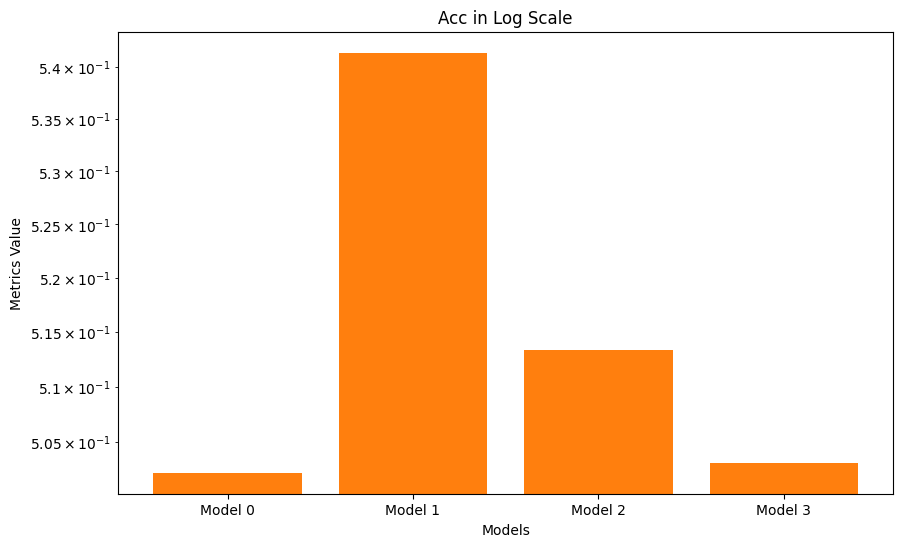

In [47]:
plot_metric("Acc", 1)

In [48]:
# Output complete results   
for i, cv_score in enumerate(cv_scores):
    print(f"Model {i}")
    print(cv_score)

Model 0
       RMSE       MAE      MAPE        R2       Acc
0  0.661280  0.454766  0.011674  0.964879  0.526667
1  1.423016  1.047510  0.016885  0.974187  0.460000
2  4.118081  3.362705  0.029481  0.937804  0.557778
3  6.679592  5.219650  0.022689  0.977243  0.480000
4  5.738474  4.596236  0.016657  0.974666  0.486667
Model 1
        RMSE        MAE      MAPE        R2       Acc
0   1.623440   1.263547  0.031191  0.788325  0.504444
1   5.256038   4.257768  0.067933  0.647840  0.560000
2  14.849876  12.621232  0.108428  0.191245  0.573333
3  29.589557  24.695985  0.101633  0.553426  0.564444
4  19.487487  17.080351  0.058236  0.707841  0.504444
Model 2
       RMSE       MAE      MAPE        R2       Acc
0  0.625387  0.417662  0.010719  0.968588  0.520000
1  1.250646  1.077007  0.018269  0.980062  0.444444
2  1.649098  1.225007  0.011506  0.990026  0.555556
3  4.335231  3.277948  0.015606  0.990414  0.524444
4  5.801415  4.606856  0.016680  0.974107  0.522222
Model 3
       RMSE       MA